# BIG TATA

In [1]:
import os
from pyspark.sql import SparkSession
from pyspark.sql.functions import col , sum as sum_func
from IPython.display import display


In [2]:
import findspark
findspark.init()
findspark.find()

'C:\\Program Files\\Spark\\spark-3.5.1-bin-hadoop3'

In [3]:
# Create a SparkSession
spark = SparkSession.builder \
    .appName("My Spark App") \
    .getOrCreate()

In [4]:
input_df = spark.read.csv("spotify_songs.csv", header=True, inferSchema=True)


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "c:\Users\AHMED\miniconda3\envs\big_tata\lib\site-packages\py4j\java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "c:\Users\AHMED\miniconda3\envs\big_tata\lib\site-packages\py4j\clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "c:\Users\AHMED\miniconda3\envs\big_tata\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [67]:
# 3. Display schema of DataFrame. 
input_df.printSchema()


root
 |-- track_id: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- track_artist: string (nullable = true)
 |-- track_popularity: integer (nullable = true)
 |-- track_album_id: string (nullable = true)
 |-- track_album_name: string (nullable = true)
 |-- track_album_release_date: string (nullable = true)
 |-- playlist_name: string (nullable = true)
 |-- playlist_id: string (nullable = true)
 |-- playlist_genre: string (nullable = true)
 |-- playlist_subgenre: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: double (nullable = true)


In [68]:
# clean data

# remove unnecessary columns (track_album_id , track_album_name , track_album_release_date , playlist_name , playlist_id , track_popularity)

cleaned_df = input_df.drop("track_album_id","track_album_name","track_album_release_date","playlist_name","playlist_id" ,"track_popularity" , "track_name" , "track_artist")

# print schema
cleaned_df.printSchema()

# delete all records with null values



# show records count

print(cleaned_df.count())



root
 |-- track_id: string (nullable = true)
 |-- playlist_genre: string (nullable = true)
 |-- playlist_subgenre: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: double (nullable = true)
 |-- language: string (nullable = true)
 |-- lyrics: string (nullable = true)

18454


In [69]:


# #show records with null values

# columns = cleaned_df.columns

# for column in columns:
#     print ("records with null values in column " + column)
#     cleaned_df.filter(cleaned_df[column].isNull()).show()



In [70]:

# remove records with null values

cleaned_df = cleaned_df.na.drop()

# remove records with lyrics = NA
cleaned_df = cleaned_df.filter(cleaned_df.lyrics != "NA")
features = ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]

# make sure that all this features have numeric values

for feature in features:
    cleaned_df = cleaned_df.filter(col(feature).cast("float").isNotNull() | col(feature).cast("int").isNotNull() )
    

# show records count
print(cleaned_df.count())


18184


In [71]:



# show genre with more than 100 songs
result = cleaned_df.groupBy("playlist_genre").count()
filtered_result = result.filter(col("count") > 100).select("playlist_genre")
display(filtered_result.toPandas())


# remove all records that doesn't belong to filtered_result

cleaned_df = cleaned_df.join(filtered_result, on="playlist_genre", how="left")
print(cleaned_df.count())




,playlist_genre
0,r&b
1,pop
2,edm
3,rap
4,rock
5,latin


18184


In [72]:


# show subgenre with more than 100 songs
result = cleaned_df.groupBy("playlist_subgenre").count()
filtered_result = result.filter(col("count") > 100).select("playlist_subgenre")
display(filtered_result.toPandas())

# remove all records that doesn't belong to filtered_result

cleaned_df = cleaned_df.join(filtered_result, on="playlist_subgenre", how="left")

print(cleaned_df.count())


#export to csv
pandas_df = cleaned_df.toPandas()
pandas_df.to_csv("cleaned_songs.csv", index=False , header=True)








,playlist_subgenre
0,electropop
1,latin pop
2,tropical
3,album rock
4,new jack swing
5,urban contemporary
6,big room
7,pop edm
8,permanent wave
9,trap


18184


## EDA

In [5]:
cleaned_df = spark.read.csv("cleaned_songs.csv", header=True, inferSchema=True)

print(cleaned_df.count())

18184


In [6]:
from pyspark.sql import functions as F
# features : danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms

# draw distribution of each audio feature

features = ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]

# transform genre column to string array 
genres = cleaned_df.select("playlist_genre").distinct().select(F.collect_list('playlist_genre')).first()[0]




In [7]:

for feature in features:
    display(cleaned_df.select(feature).summary().toPandas())

,summary,danceability
0,count,18184
1,mean,0.6442043004839418
2,stddev,0.15012583733803528
3,min,0.116
4,25%,0.545
5,50%,0.66
6,75%,0.7559999999999999
7,max,0.979


,summary,energy
0,count,18184
1,mean,0.6928828090629123
2,stddev,0.17926713617877324
3,min,0.0167
4,25%,0.574
5,50%,0.715
6,75%,0.8340000000000001
7,max,1.0


,summary,key
0,count,18184
1,mean,5.342498900131984
2,stddev,3.6148583732533655
3,min,0.0
4,25%,2.0
5,50%,6.0
6,75%,9.0
7,max,11.0


,summary,loudness
0,count,18184
1,mean,-6.749788275406952
2,stddev,2.893395674596352
3,min,-34.283
4,25%,-8.218
5,50%,-6.221
6,75%,-4.717
7,max,1.275


,summary,mode
0,count,18184
1,mean,0.5822151341838979
2,stddev,0.49320791668275055
3,min,0.0
4,25%,0.0
5,50%,1.0
6,75%,1.0
7,max,1.0


,summary,speechiness
0,count,18184
1,mean,0.10627822261328643
2,stddev,0.10232011216882282
3,min,0.0224
4,25%,0.0396
5,50%,0.0602
6,75%,0.131
7,max,0.918


,summary,acousticness
0,count,18184
1,mean,0.17438678622635276
2,stddev,0.21600116784256618
3,min,1.4E-6
4,25%,0.0163
5,50%,0.0821
6,75%,0.252
7,max,0.992


,summary,instrumentalness
0,count,18184
1,mean,0.04337248021722392
2,stddev,0.1506256884108591
3,min,0.0
4,25%,0.0
5,50%,7.42E-6
6,75%,0.00135
7,max,0.987


,summary,liveness
0,count,18184
1,mean,0.18939507039155312
2,stddev,0.15340515322901194
3,min,0.00936
4,25%,0.0926
5,50%,0.128
6,75%,0.246
7,max,0.996


,summary,valence
0,count,18184
1,mean,0.5228574356577211
2,stddev,0.22761868320033324
3,min,1.0E-5
4,25%,0.34700000000000003
5,50%,0.523
6,75%,0.7020000000000001
7,max,0.991


,summary,tempo
0,count,18184
1,mean,120.79643263308402
2,stddev,27.629675318437013
3,min,37.114
4,25%,98.528
5,50%,120.027
6,75%,136.00799999999998
7,max,214.047


,summary,duration_ms
0,count,18184
1,mean,230549.0757259129
2,stddev,56735.896677169534
3,min,31893.0
4,25%,193594.0
5,50%,221467.0
6,75%,258027.0
7,max,517810.0


In [ ]:
# import pyspark.sql.functions as F
# from pyspark.sql.types import StringType

# # Define the quantiles you want to use
# quantiles = [0.25, 0.5, 0.75]

# # Calculate quantiles for each feature
# feature_quantiles = {}
# for feature in features:
#     # get min and max values
#     feature_quantiles[feature] = cleaned_df.approxQuantile(feature, quantiles, 0.01)
#     feature_min = cleaned_df.agg({feature: "min"}).collect()[0][0]
#     feature_quantiles[feature] = [feature_min] + feature_quantiles[feature]
#     feature_max = cleaned_df.agg({feature: "max"}).collect()[0][0]
#     feature_quantiles[feature].append(feature_max)  # Add max value to the end

# # Define a function to create bins based on quantiles
# def bin_quantile(value, quantiles):
#     for i, quantile in enumerate(quantiles):
#         if value < quantile:
#             if i == 0:
#                 return f"(<{quantile})"
#             else:
#                 return f"({quantiles[i-1]}-{quantile})"
#     return f"({quantiles[i-1]}-{quantile})"

# # Create bins for each feature
# binned_df = cleaned_df
# for feature in features:
#     bins_udf = F.udf(lambda x: bin_quantile(x, feature_quantiles[feature]), StringType())
#     binned_df = binned_df.withColumn(feature + "_bin", bins_udf(F.col(feature)))

# # Perform the analysis using bins
# for feature in features:
#     display(binned_df.crosstab("playlist_genre", feature + "_bin").toPandas())

,playlist_genre_danceability_bin,(0.116-0.545),(0.545-0.6579999999999999),(0.6579999999999999-0.753),(0.753-0.979)
0,r&b,627,735,958,988
1,pop,872,1236,1124,724
2,edm,397,650,524,351
3,rap,372,550,800,1616
4,rock,2023,937,391,161
5,latin,203,377,732,836


,playlist_genre_energy_bin,(0.0167-0.5720000000000001),(0.5720000000000001-0.711),(0.711-0.8320000000000001),(0.8320000000000001-1.0)
0,r&b,1530,887,584,307
1,pop,845,952,1159,1000
2,edm,113,297,555,957
3,rap,843,1091,867,537
4,rock,770,639,717,1386
5,latin,368,584,703,493


,playlist_genre_key_bin,(0.0-2.0),(2.0-5.0),(5.0-8.0),(8.0-11.0)
0,r&b,758,534,939,1077
1,pop,938,719,1035,1264
2,edm,446,342,521,613
3,rap,849,549,781,1159
4,rock,660,908,861,1083
5,latin,502,332,585,729


,playlist_genre_loudness_bin,(-34.283--8.241),(-4.766-1.275),(-6.257--4.766),(-8.241--6.257)
0,r&b,1318,331,644,1015
1,pop,700,1177,1125,954
2,edm,119,969,554,280
3,rap,715,767,892,964
4,rock,1330,787,666,729
5,latin,331,669,624,524


,playlist_genre_mode_bin,(0.0-1.0),(1.0-1.0)
0,r&b,1571,1737
1,pop,1564,2392
2,edm,944,978
3,rap,1550,1788
4,rock,1037,2475
5,latin,931,1217


,playlist_genre_speechiness_bin,(0.0224-0.0394),(0.0394-0.0594),(0.0594-0.127),(0.127-0.918)
0,r&b,750,755,854,949
1,pop,1244,1245,977,490
2,edm,315,674,611,322
3,rap,152,326,698,2162
4,rock,1580,937,775,220
5,latin,416,564,632,536


,playlist_genre_acousticness_bin,(0.0158-0.0805),(0.0805-0.245),(0.245-0.992),(1.4e-06-0.0158)
0,r&b,711,878,1317,402
1,pop,1106,957,922,971
2,edm,571,327,187,837
3,rap,952,1011,784,591
4,rock,683,615,792,1422
5,latin,533,708,672,235


,playlist_genre_instrumentalness_bin,(0.0-6.7e-06),(0.00115-0.987),(6.7e-06-0.00115)
0,r&b,1736,702,870
1,pop,1905,1077,974
2,edm,648,808,466
3,rap,2326,411,601
4,rock,1064,1393,1055
5,latin,1311,317,520


,playlist_genre_liveness_bin,(0.00936-0.0922),(0.0922-0.126),(0.126-0.239),(0.239-0.996)
0,r&b,886,893,796,733
1,pop,941,1082,1032,901
2,edm,474,381,484,583
3,rap,692,871,864,911
4,rock,901,689,891,1031
5,latin,586,501,526,535


,playlist_genre_valence_bin,(0.344-0.521),(0.521-0.696),(0.696-0.991),(1e-05-0.344)
0,r&b,770,866,913,759
1,pop,1117,964,913,962
2,edm,528,348,238,808
3,rap,829,919,764,826
4,rock,897,840,967,808
5,latin,429,551,892,276


,playlist_genre_tempo_bin,(120.007-135.00799999999998),(135.00799999999998-214.047),(37.114-98.141),(98.141-120.007)
0,r&b,444,701,1179,984
1,pop,1103,889,721,1243
2,edm,1291,263,107,261
3,rap,485,1200,1124,529
4,rock,777,1198,654,883
5,latin,386,446,725,591


,playlist_genre_duration_ms_bin,(193173.0-221176.0),(221176.0-256533.0),(256533.0-517810.0),(31893.0-193173.0)
0,r&b,571,905,1220,612
1,pop,1334,963,598,1061
2,edm,575,363,372,612
3,rap,679,762,830,1067
4,rock,724,901,1326,561
5,latin,665,576,342,565


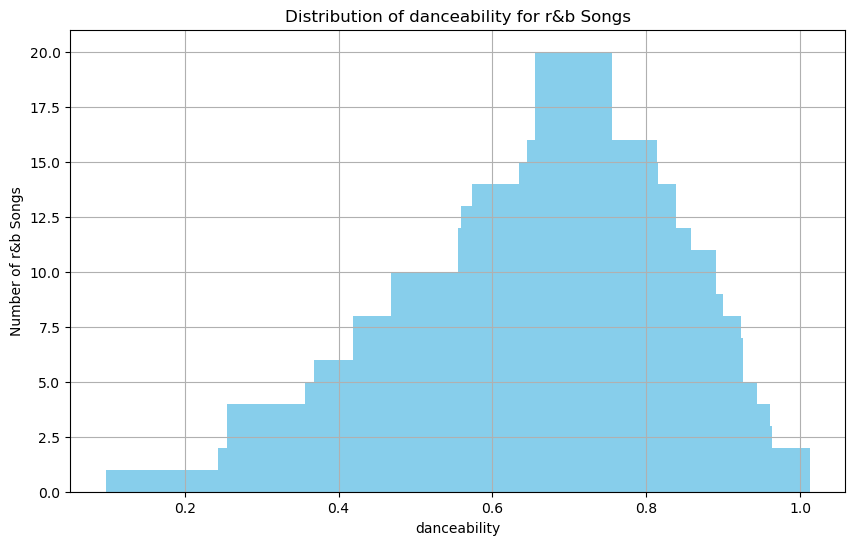

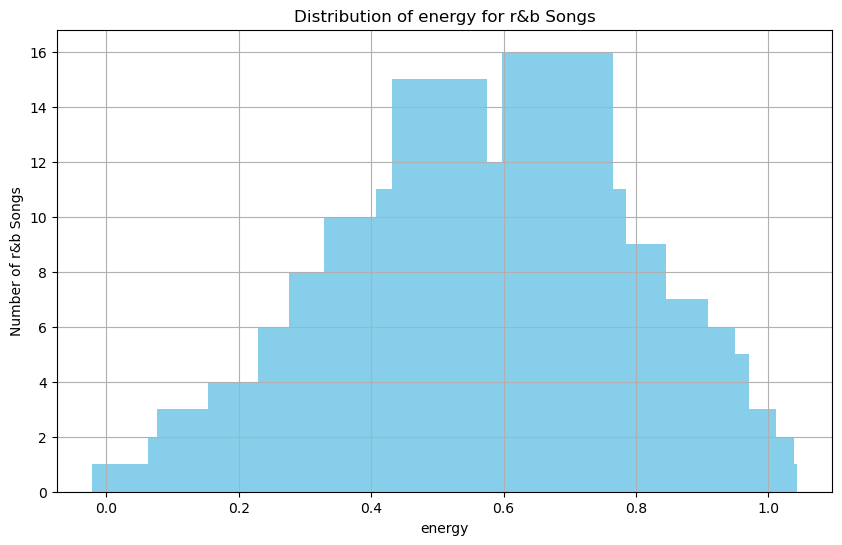

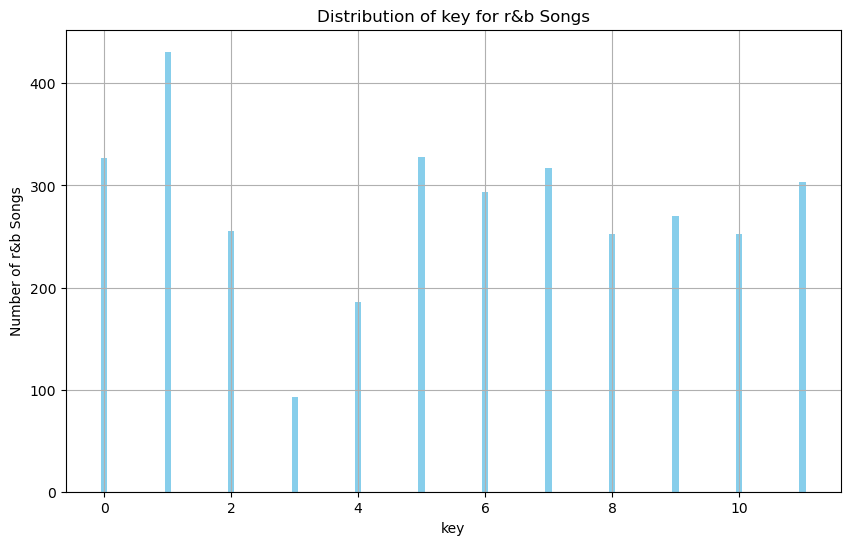

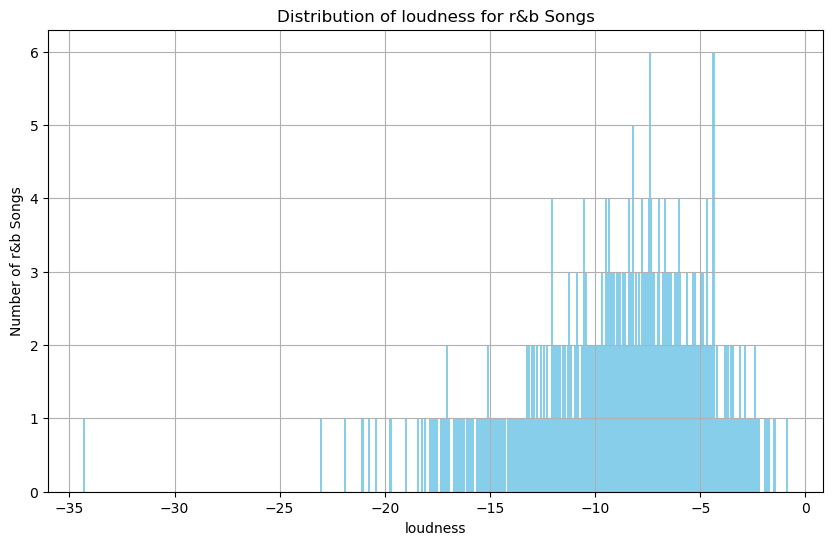

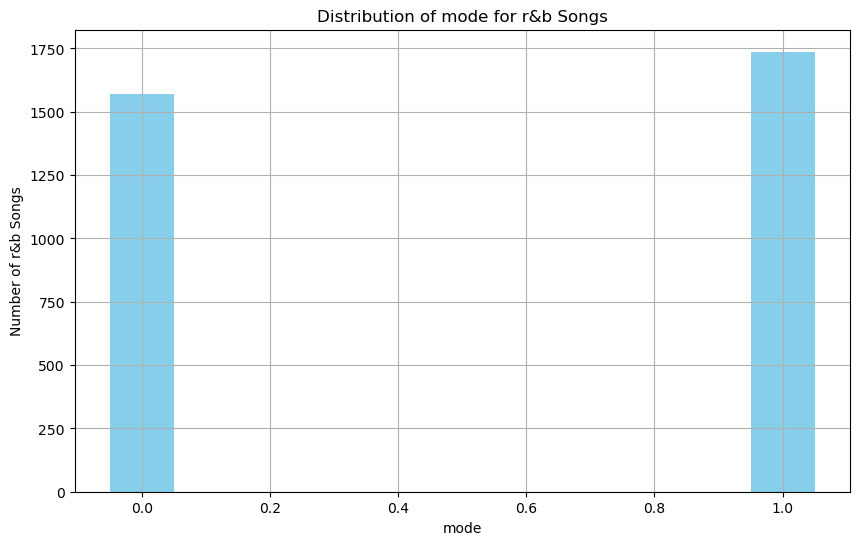

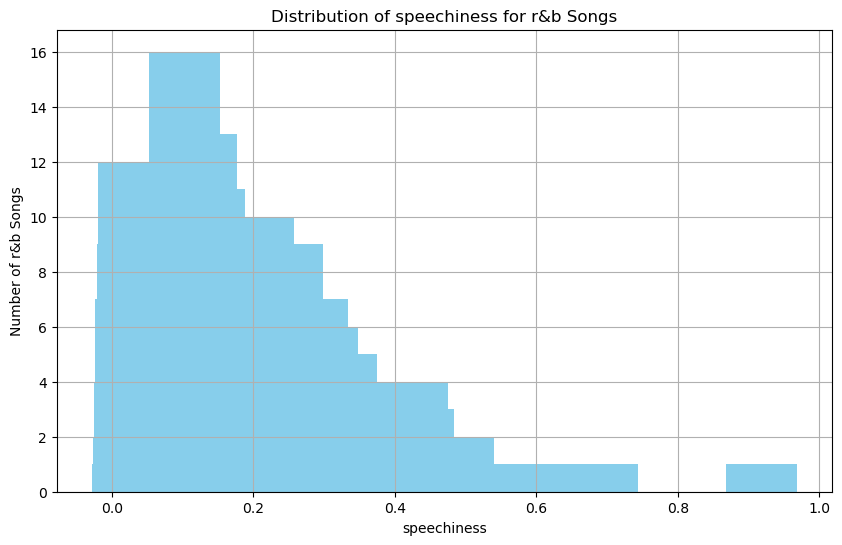

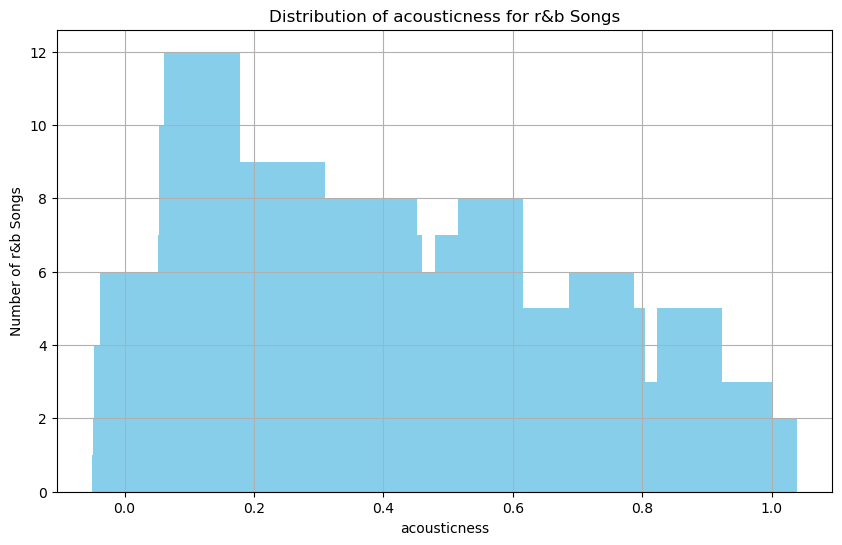

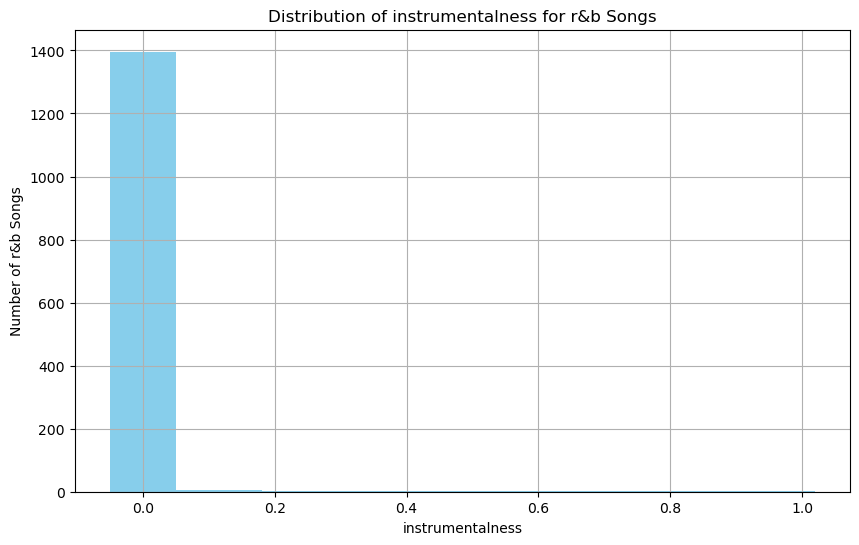

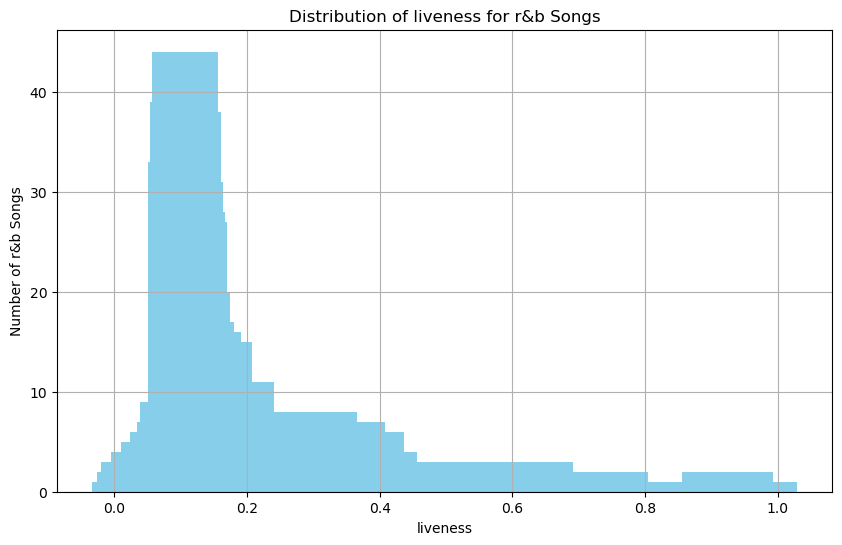

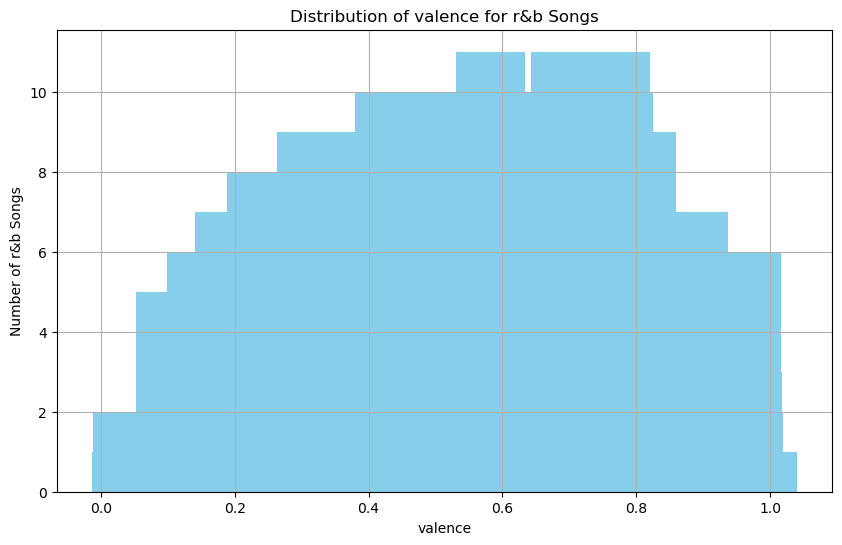

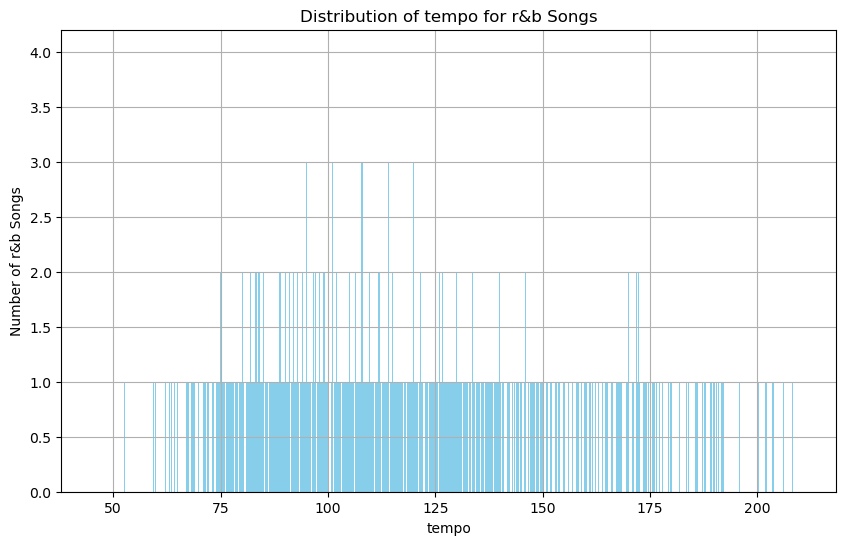

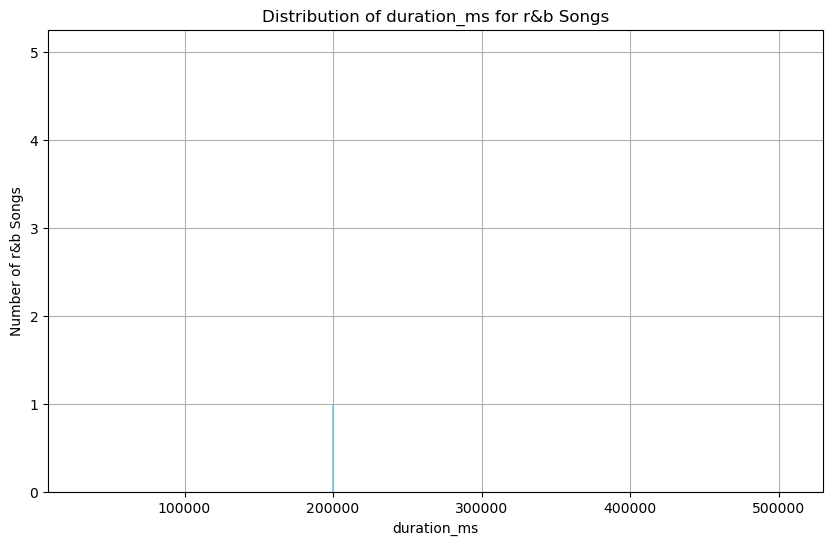

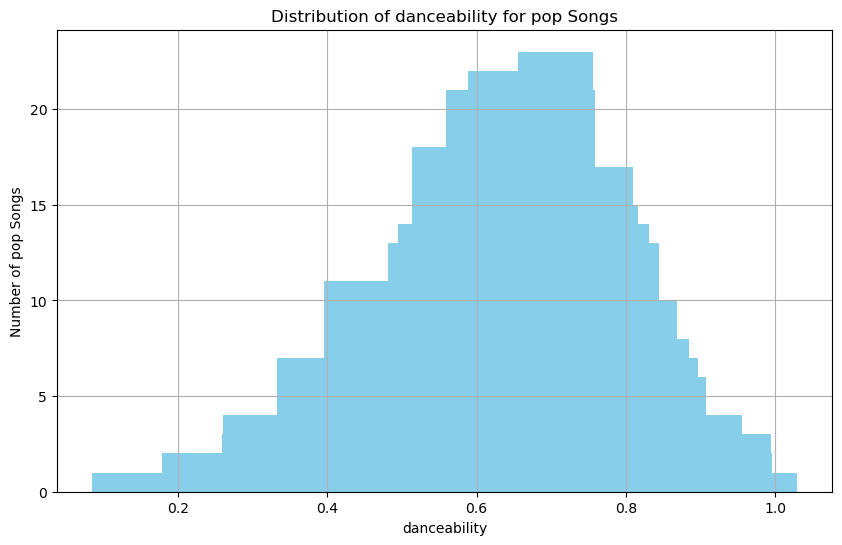

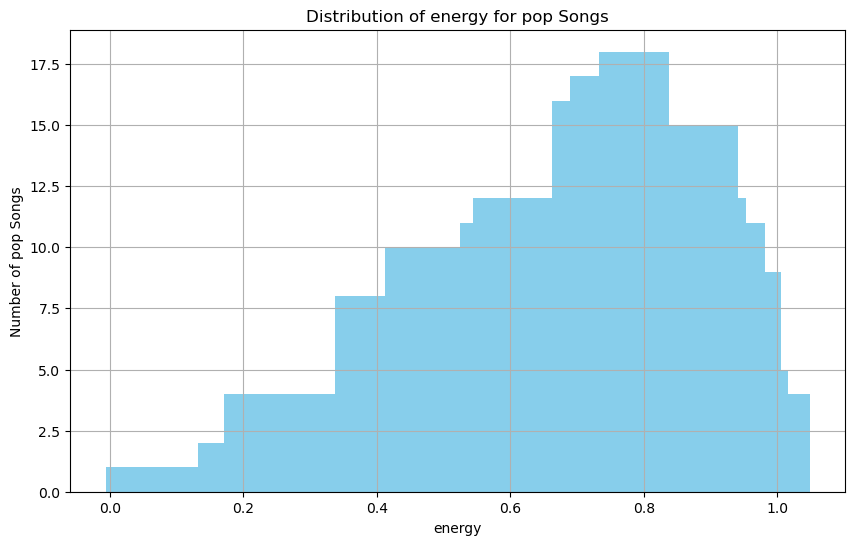

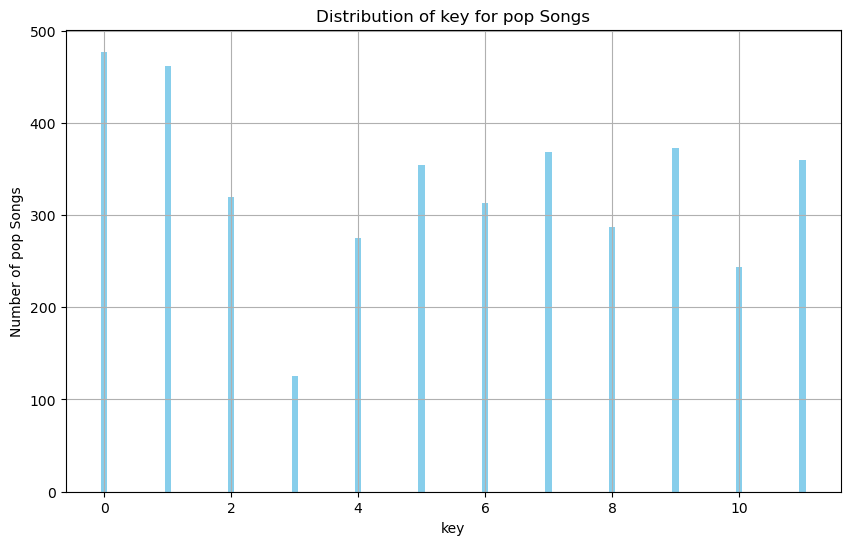

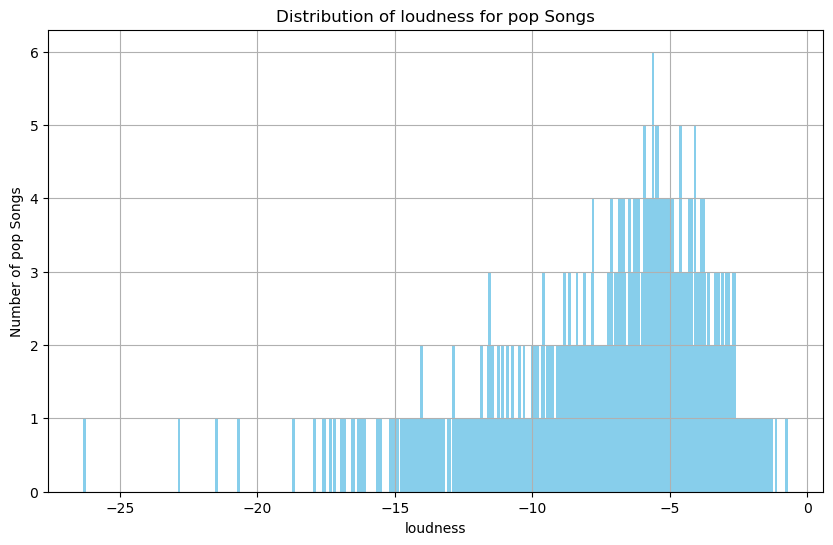

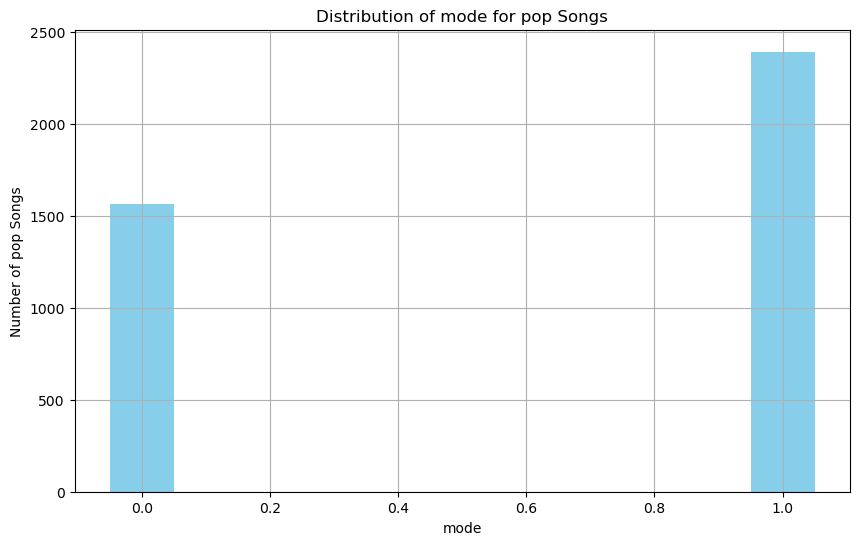

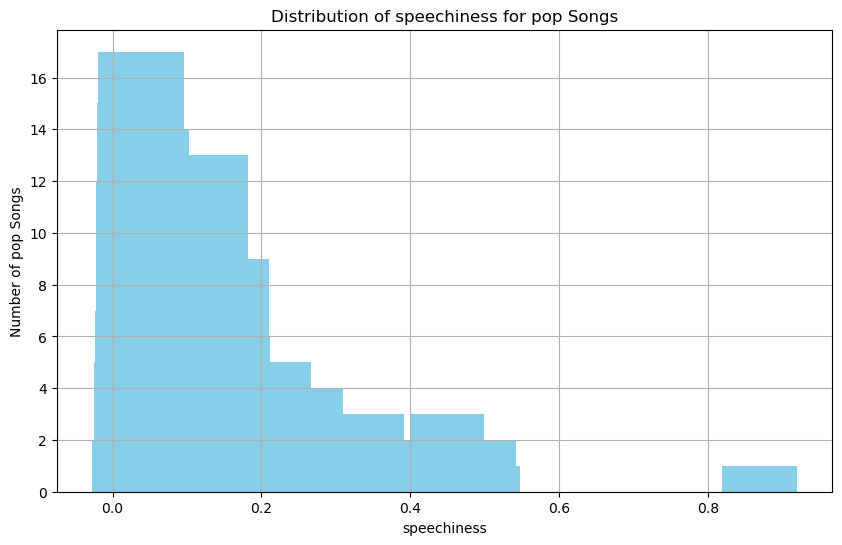

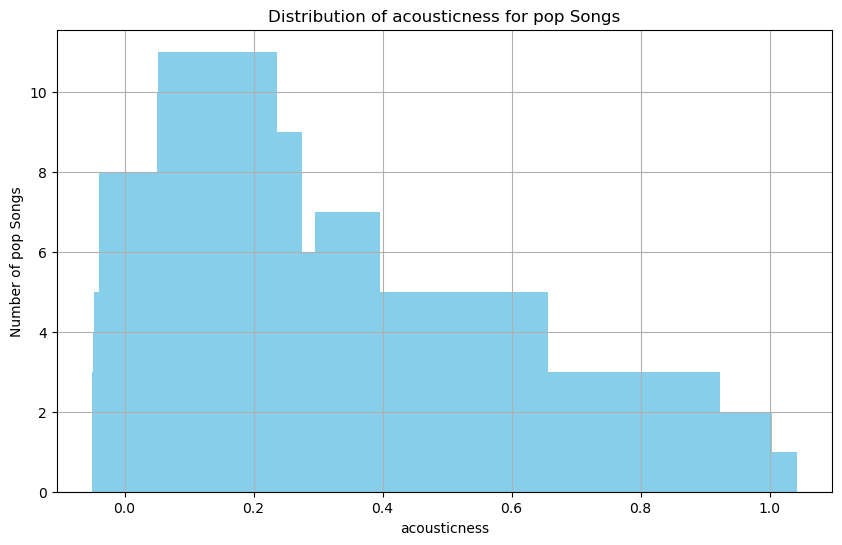

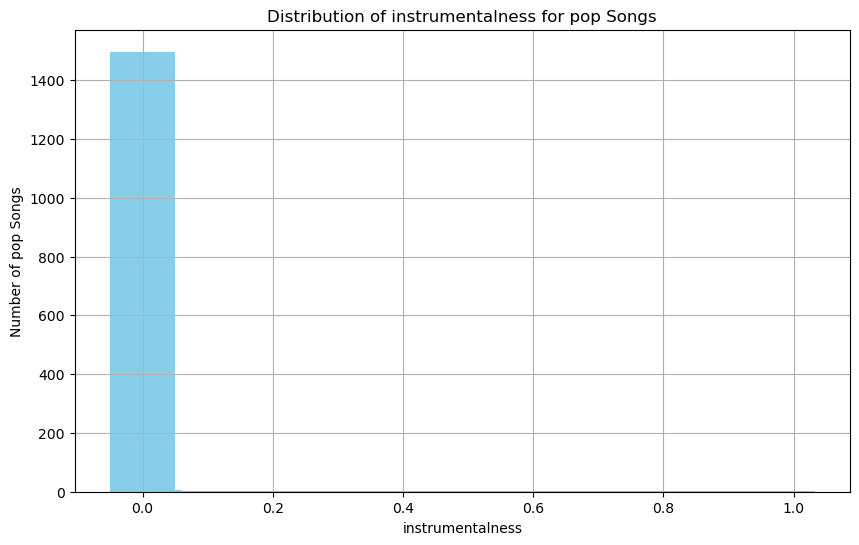

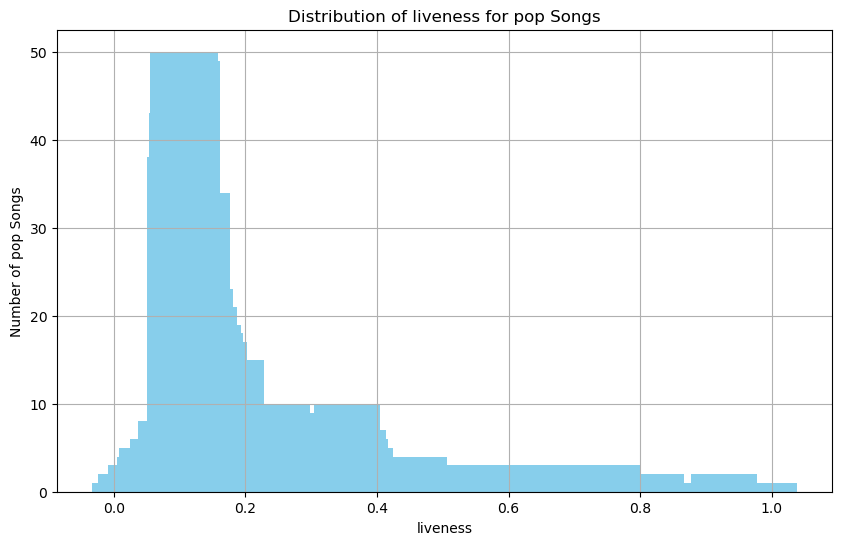

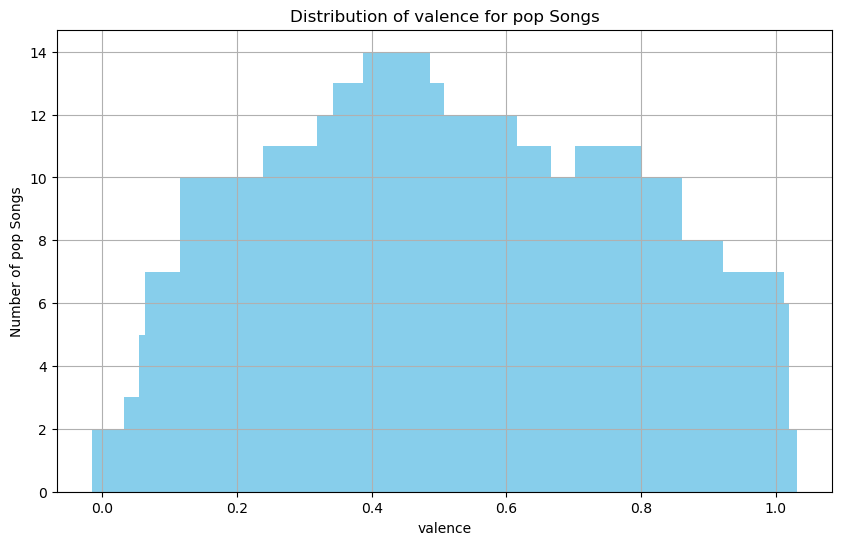

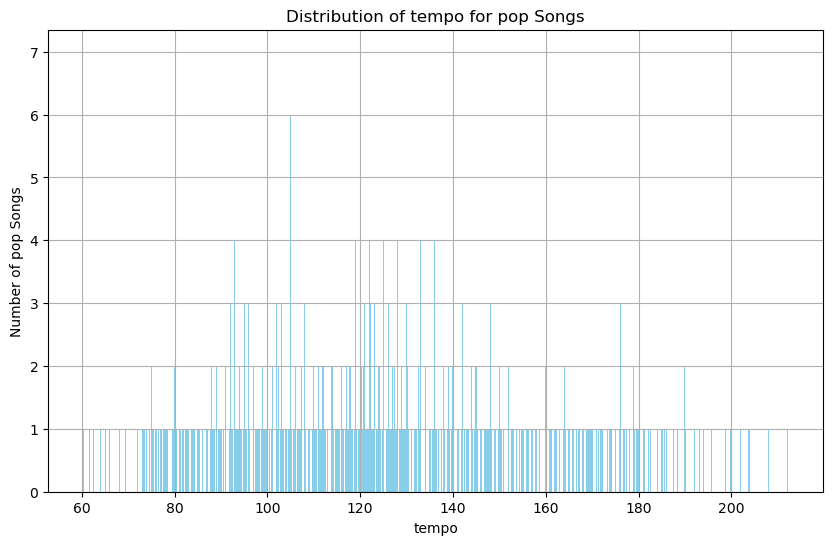

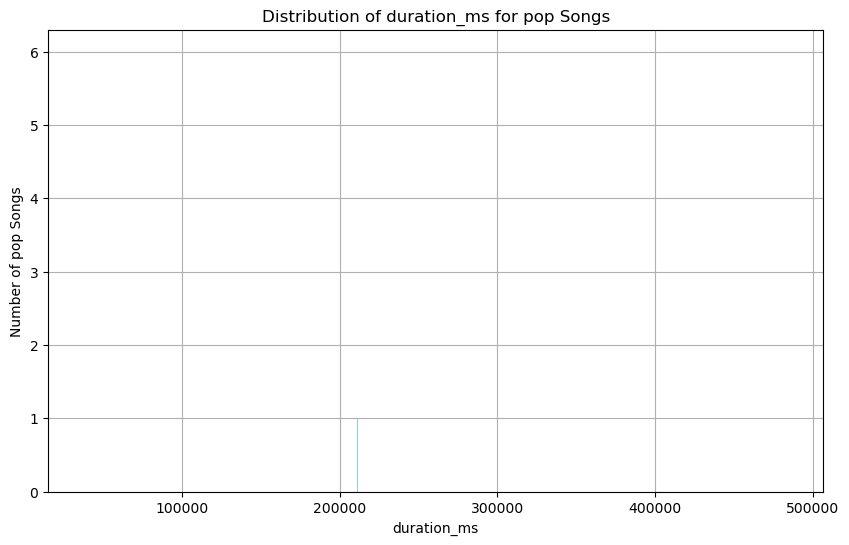

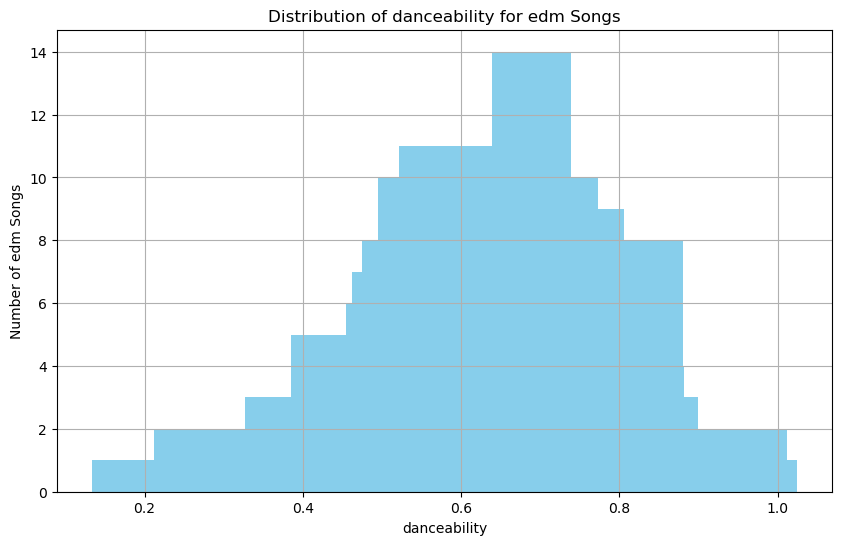

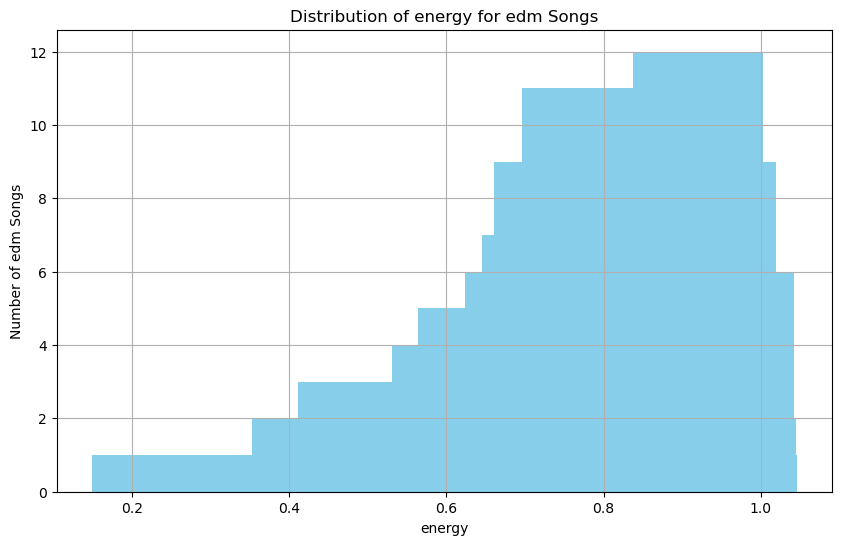

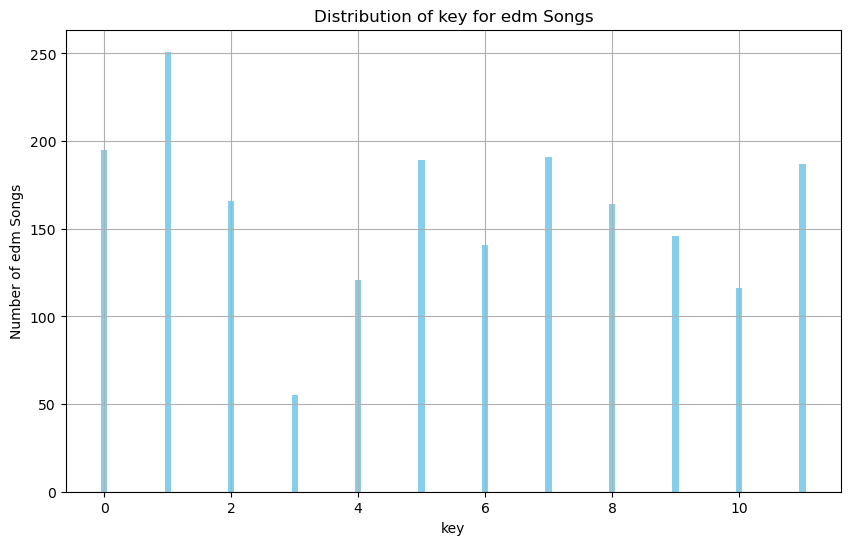

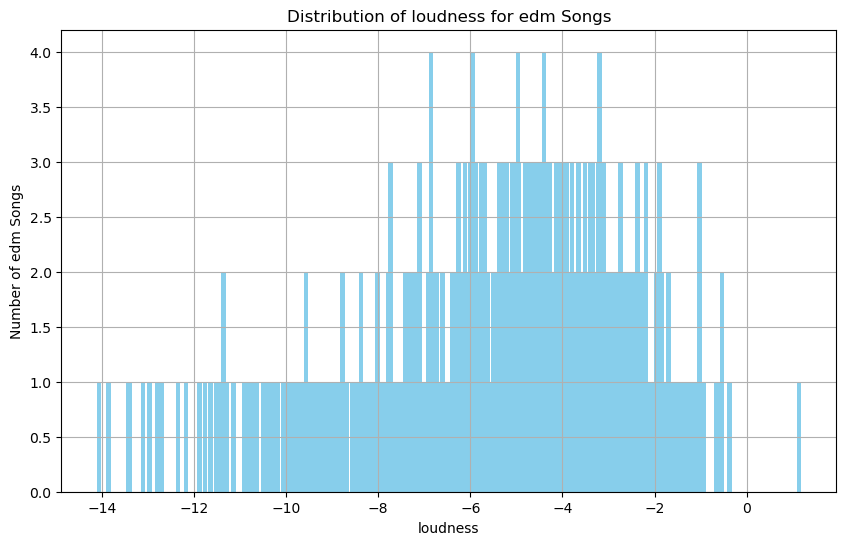

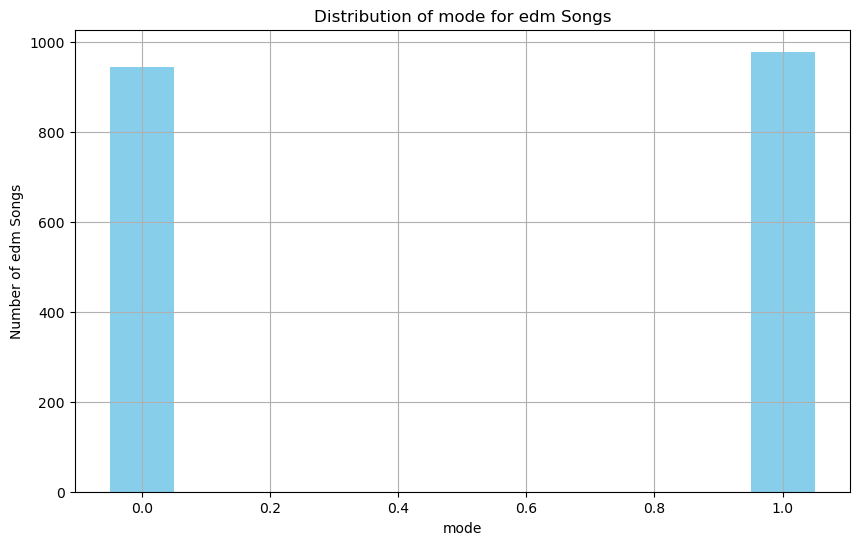

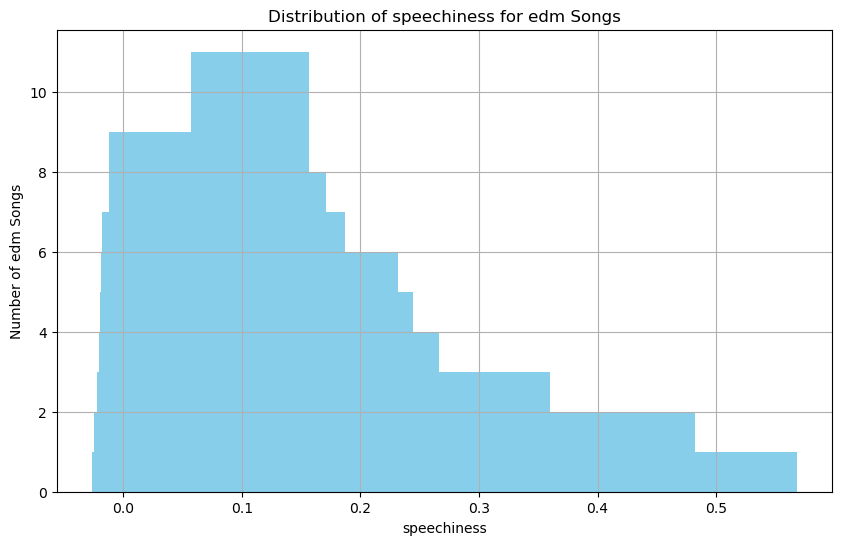

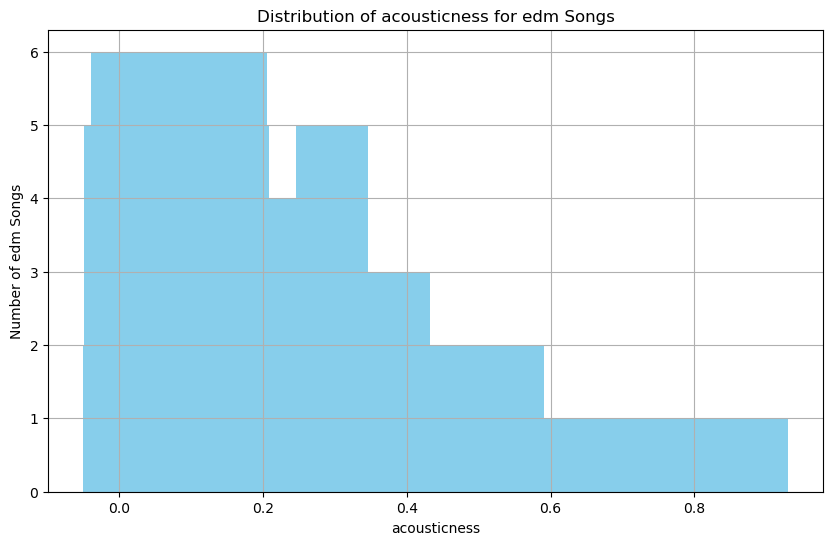

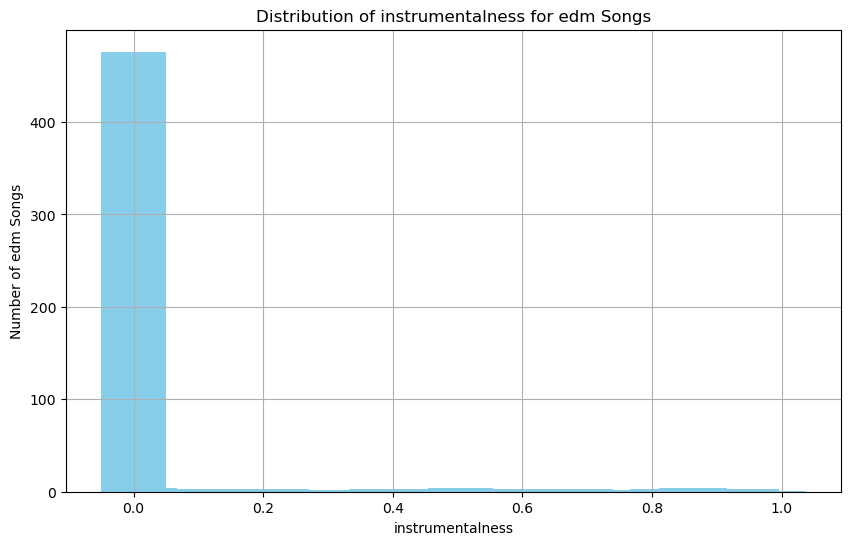

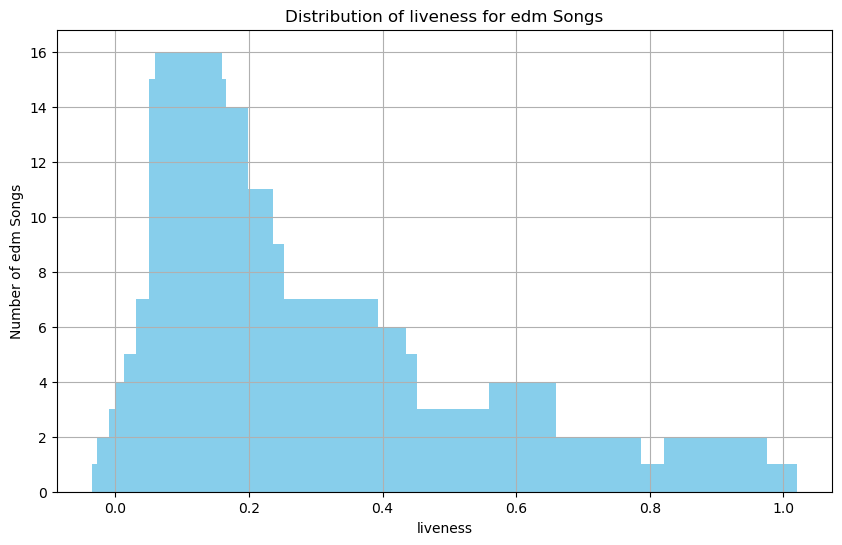

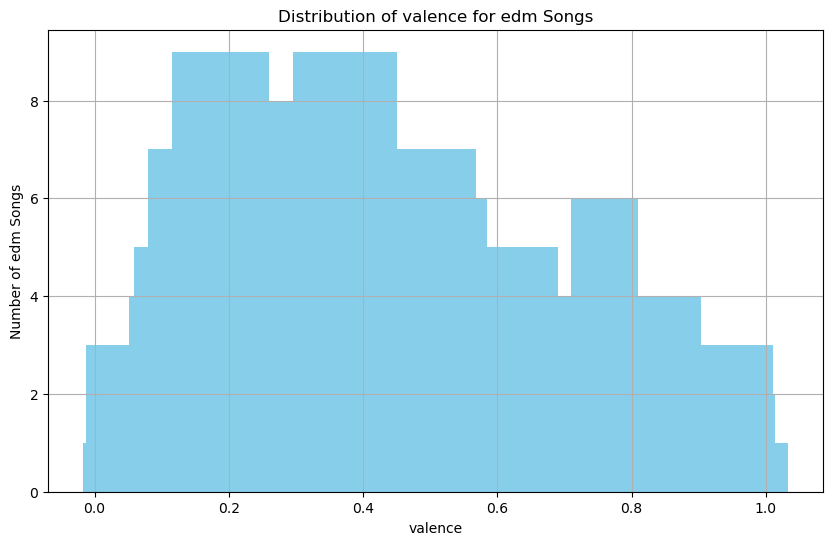

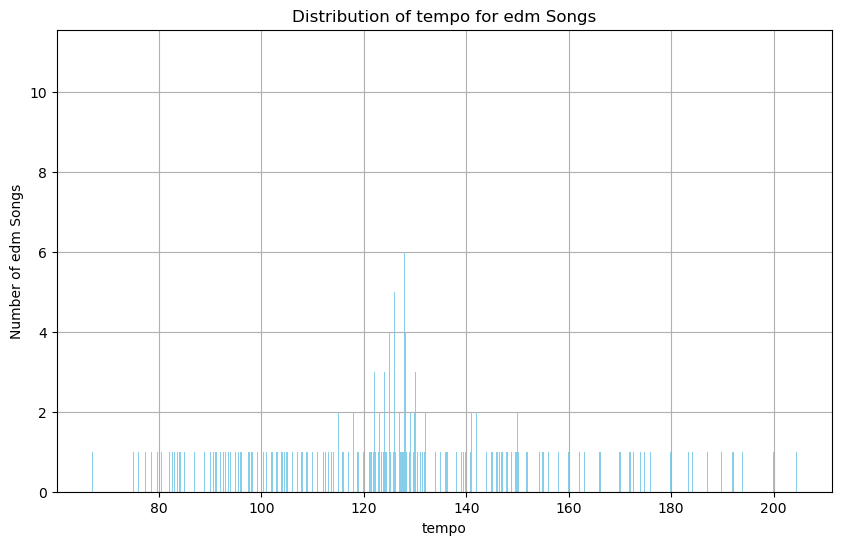

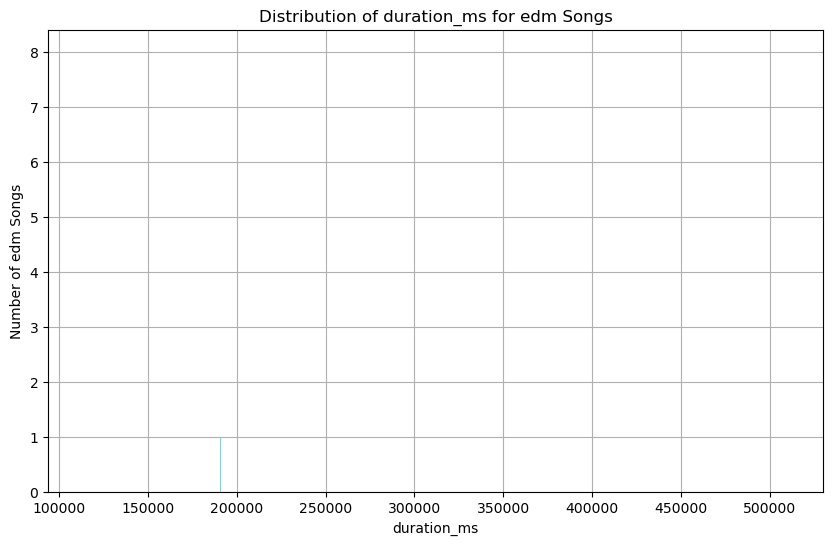

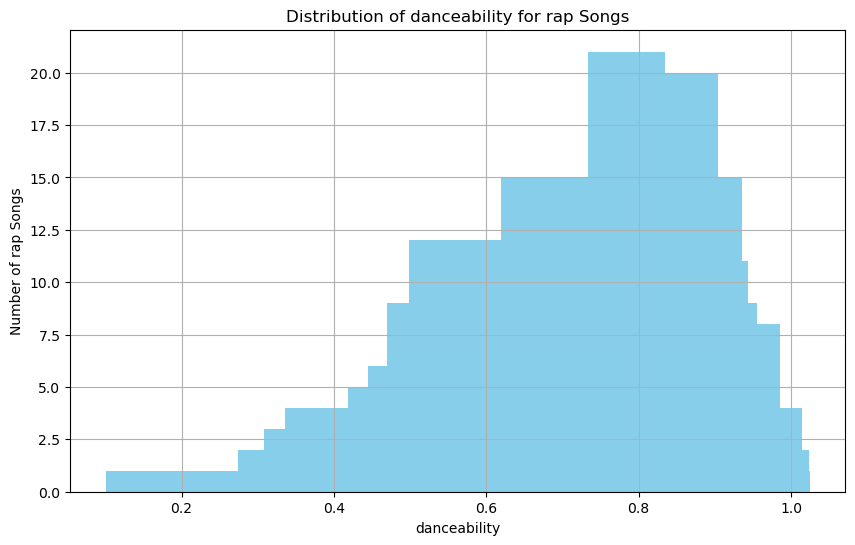

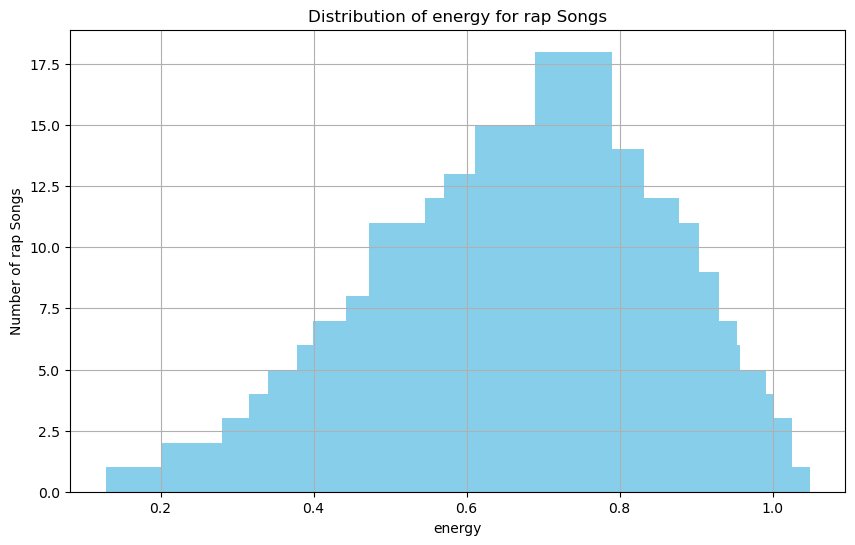

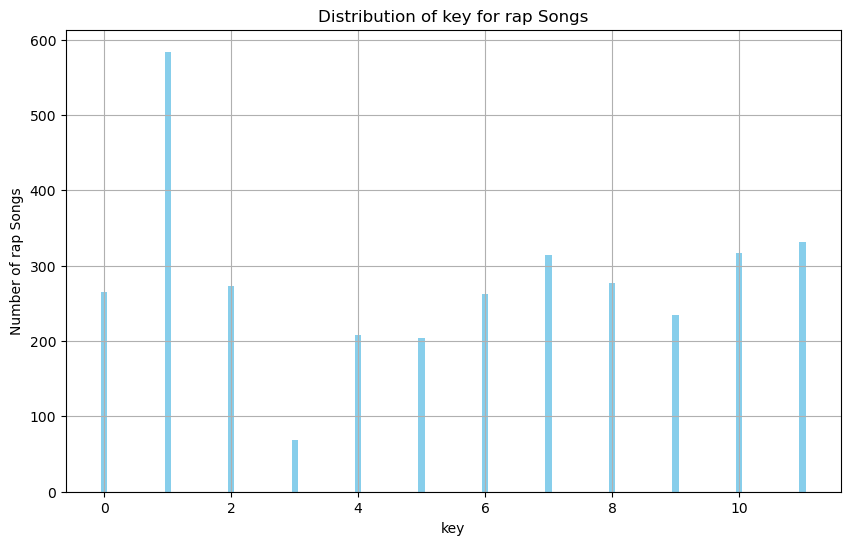

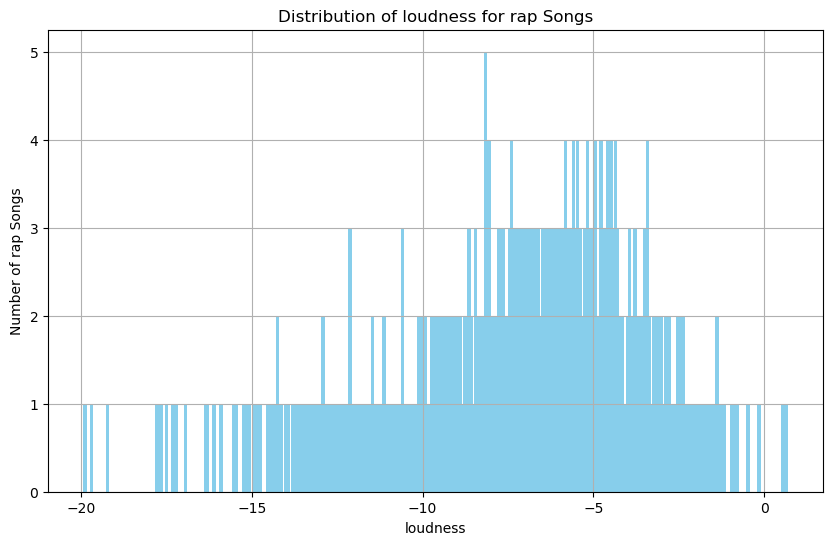

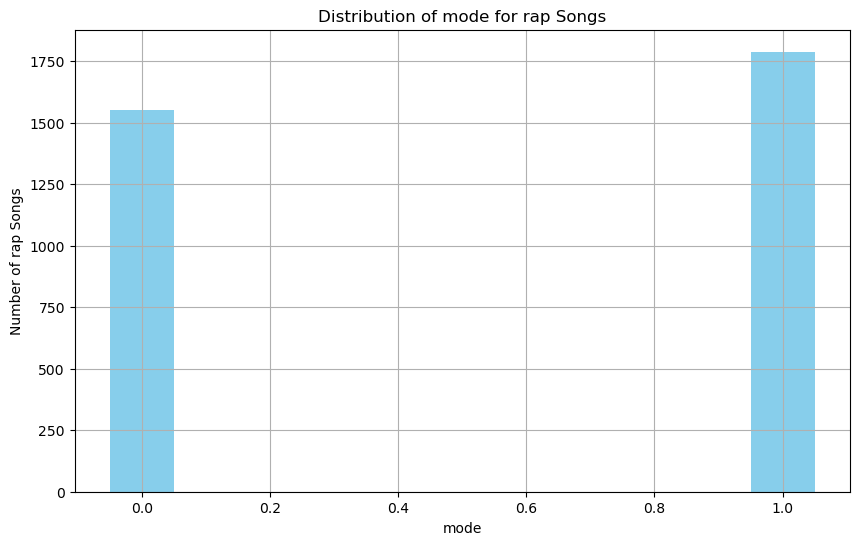

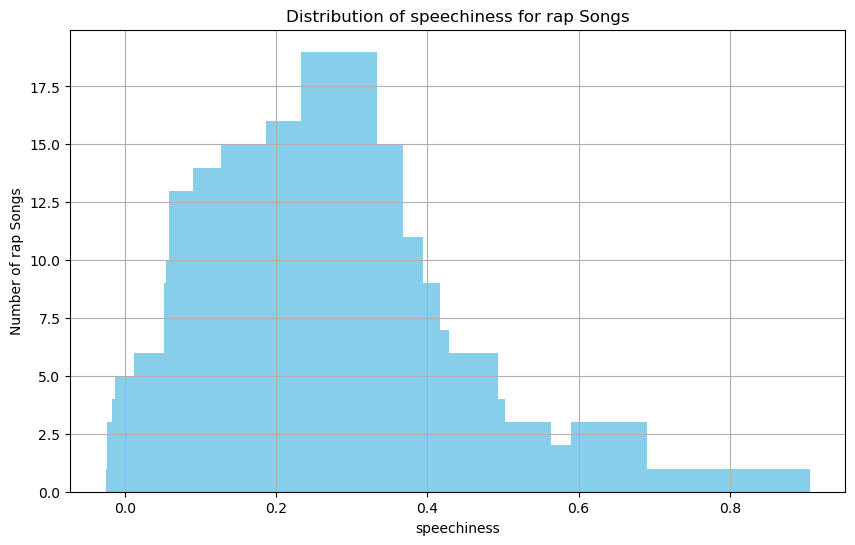

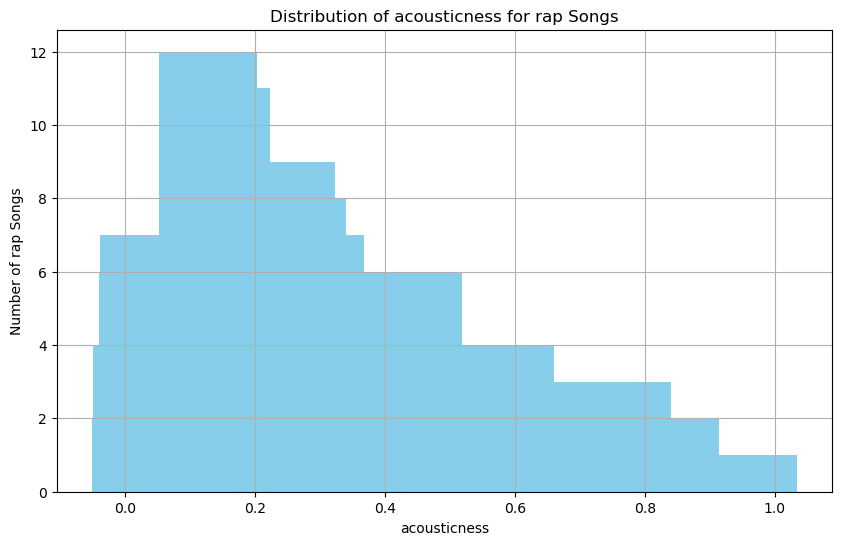

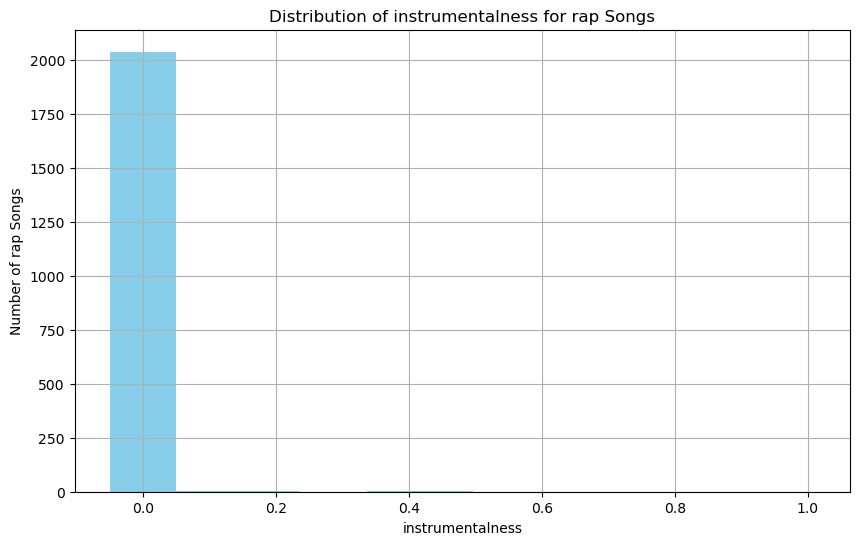

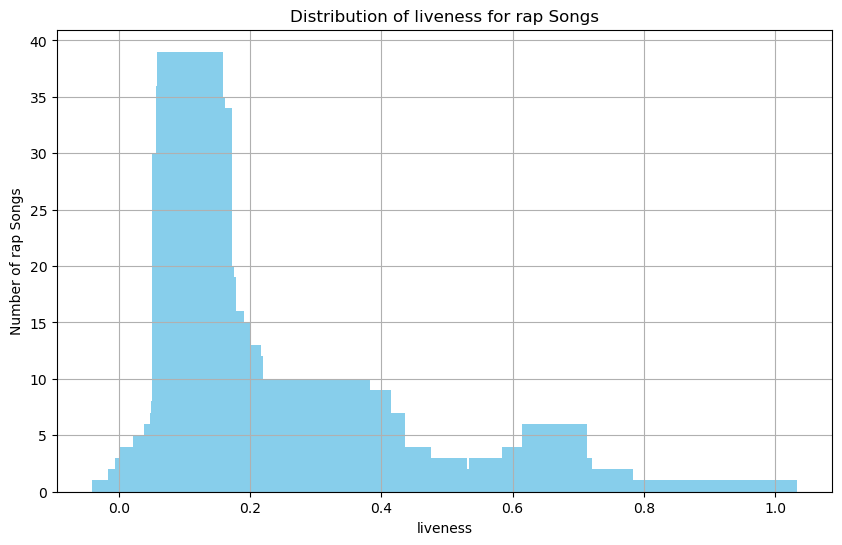

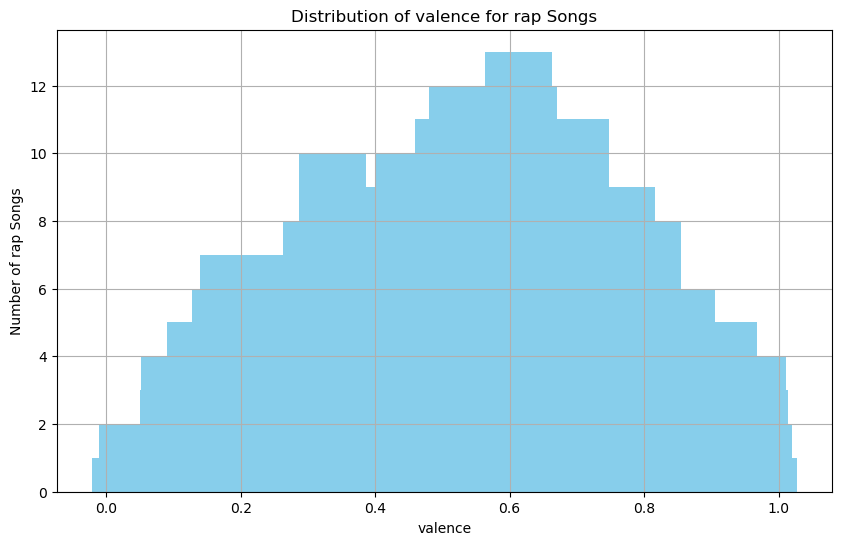

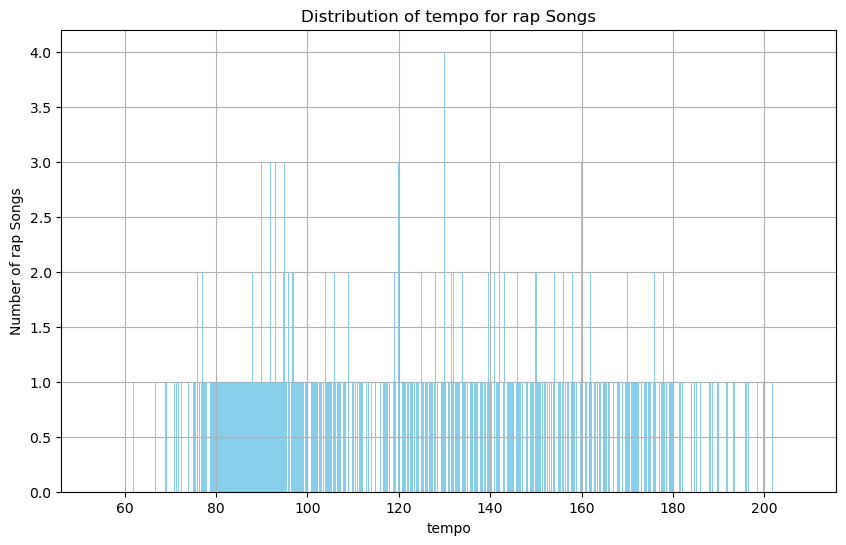

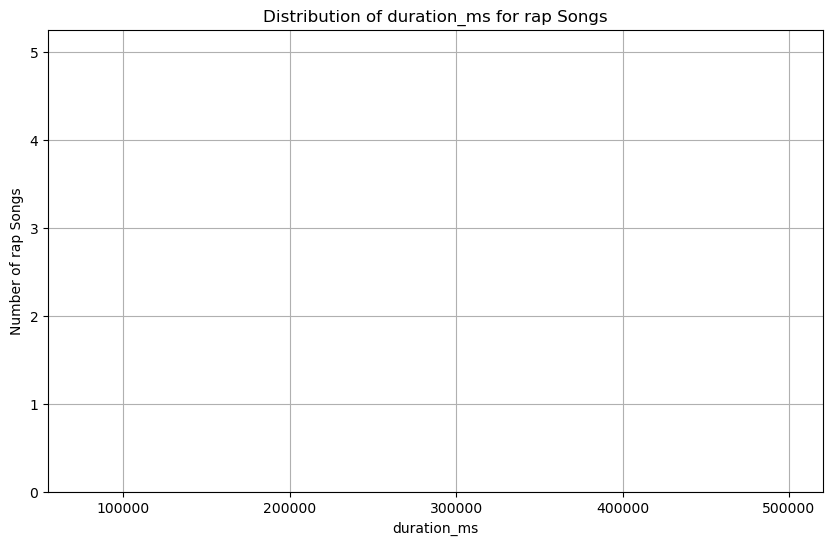

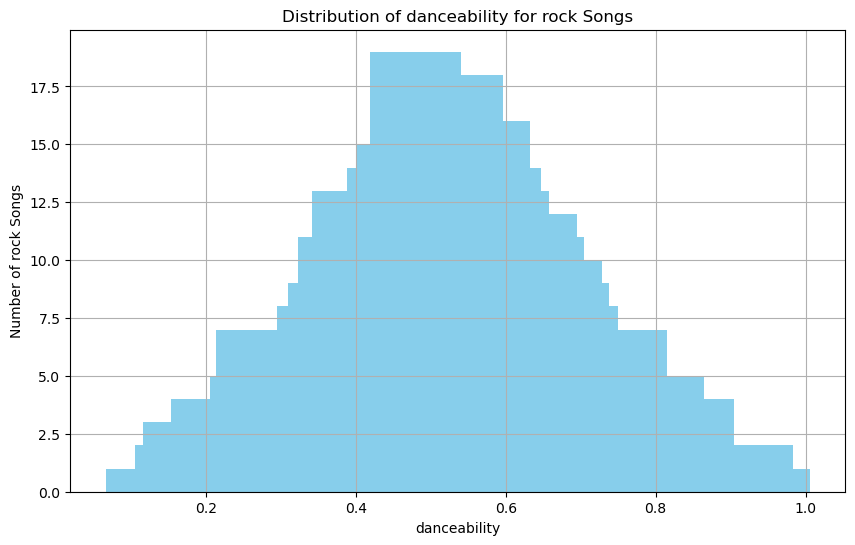

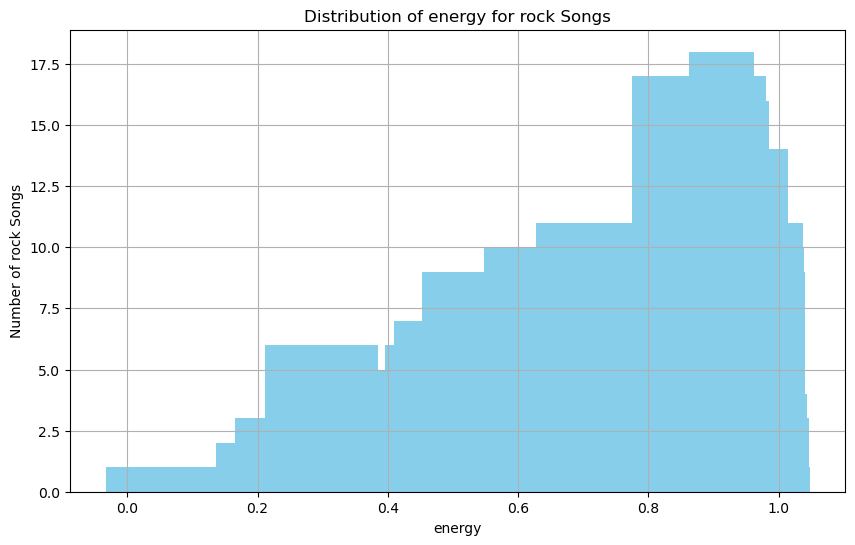

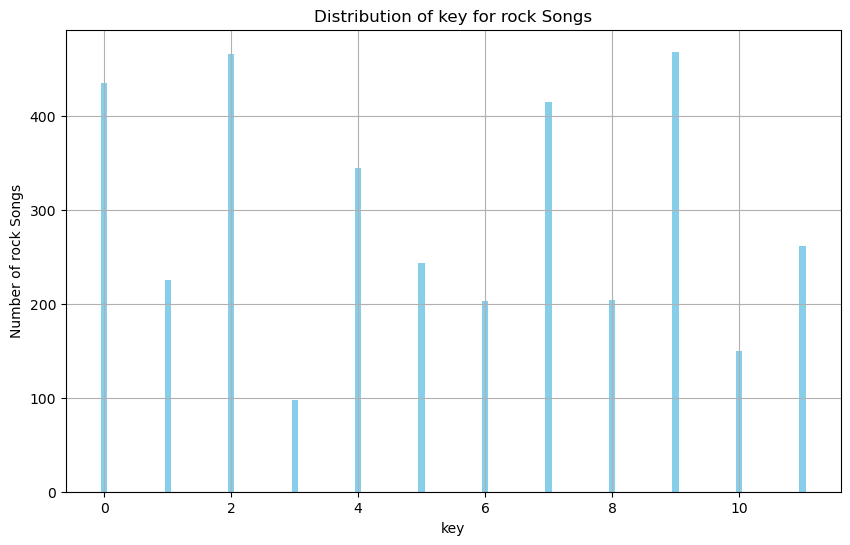

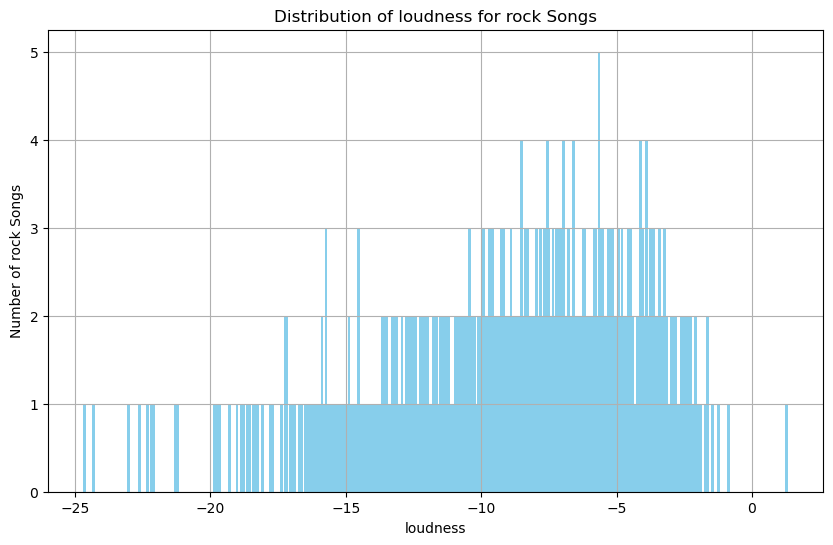

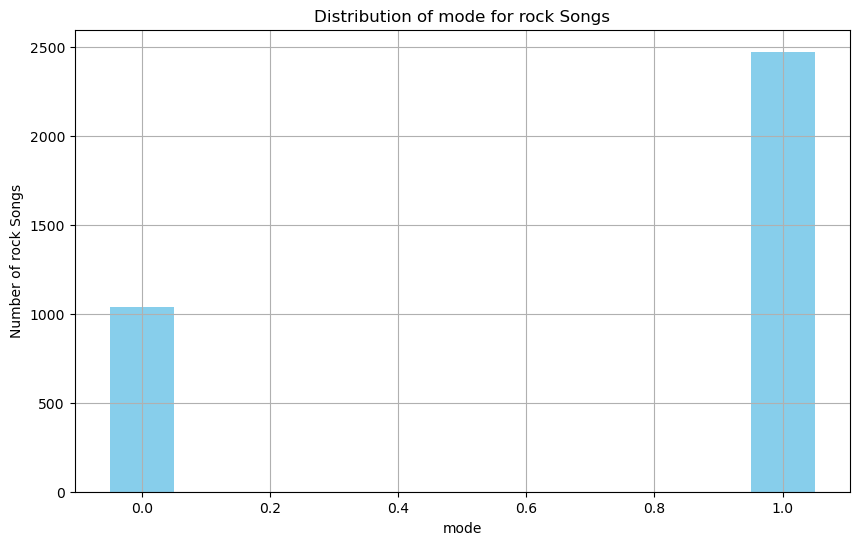

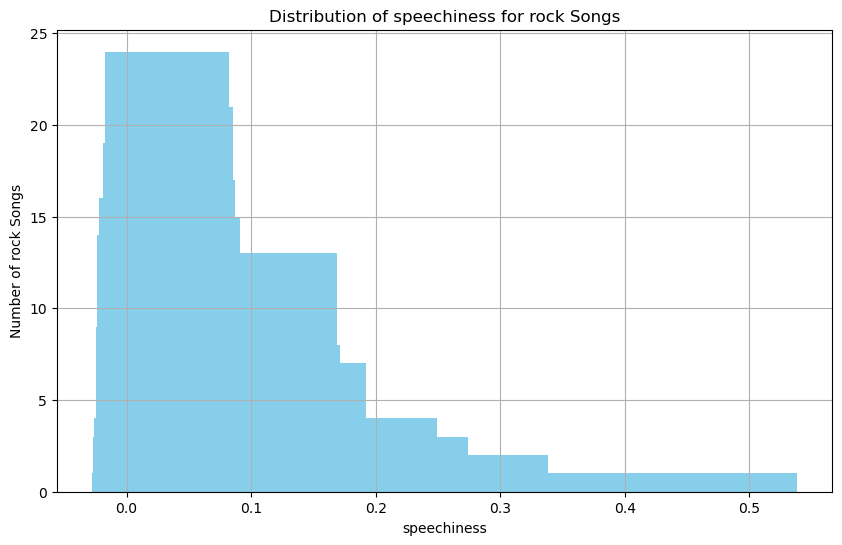

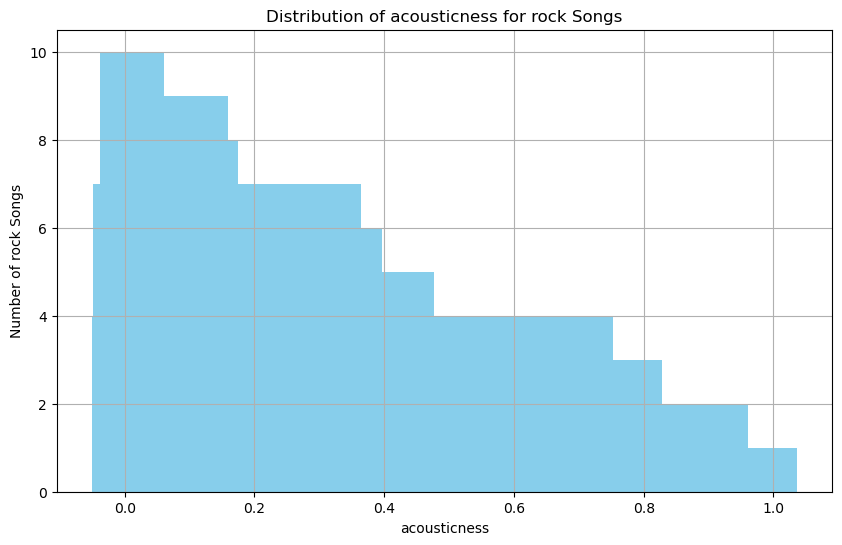

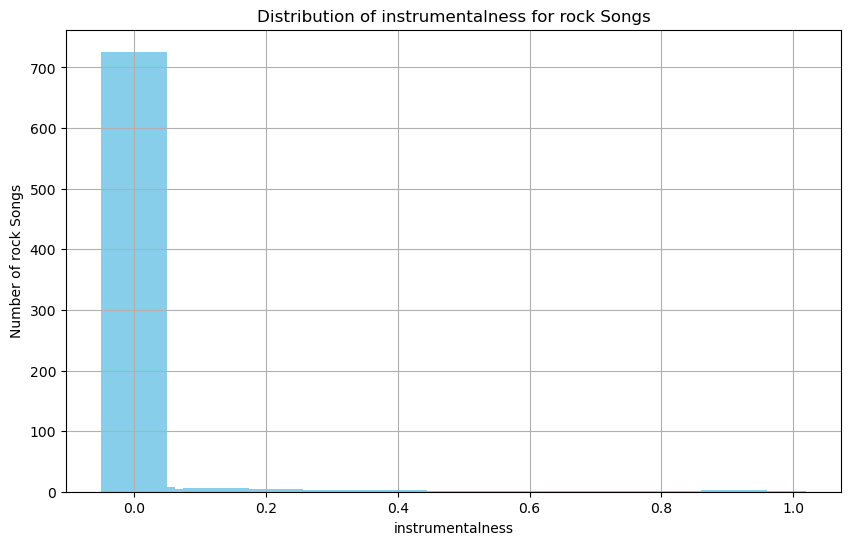

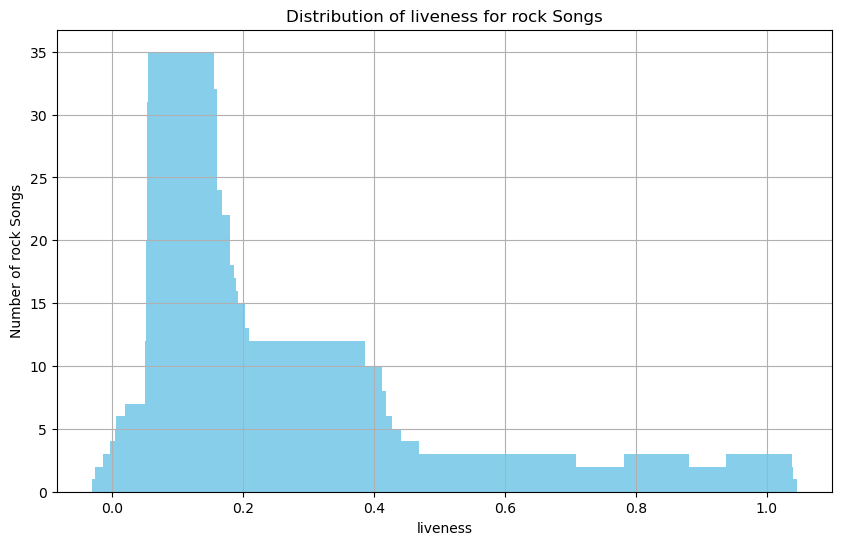

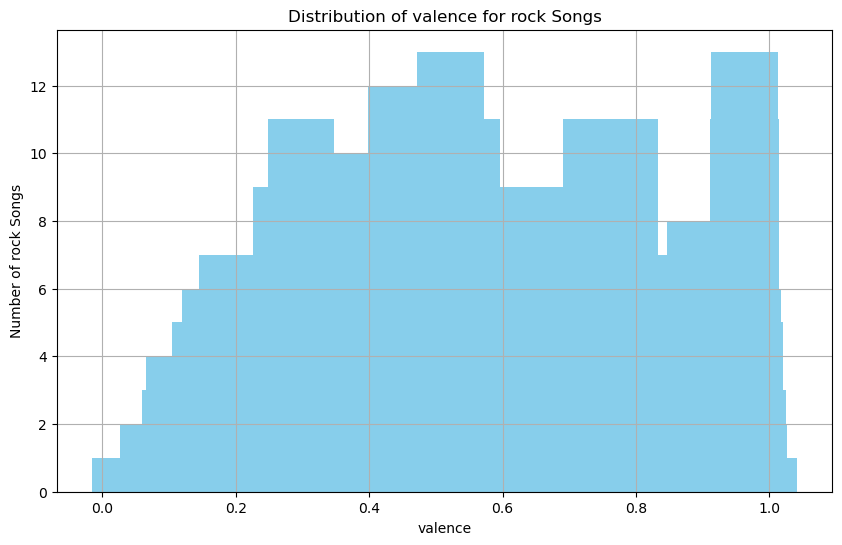

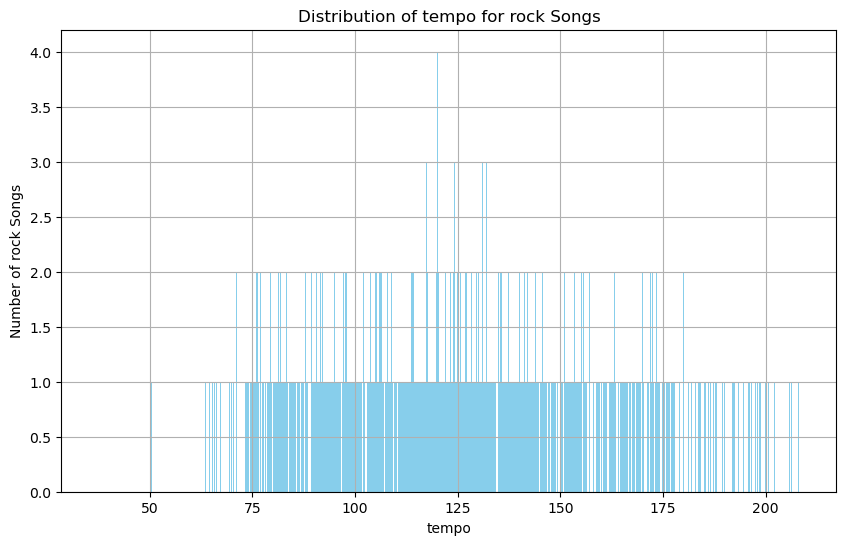

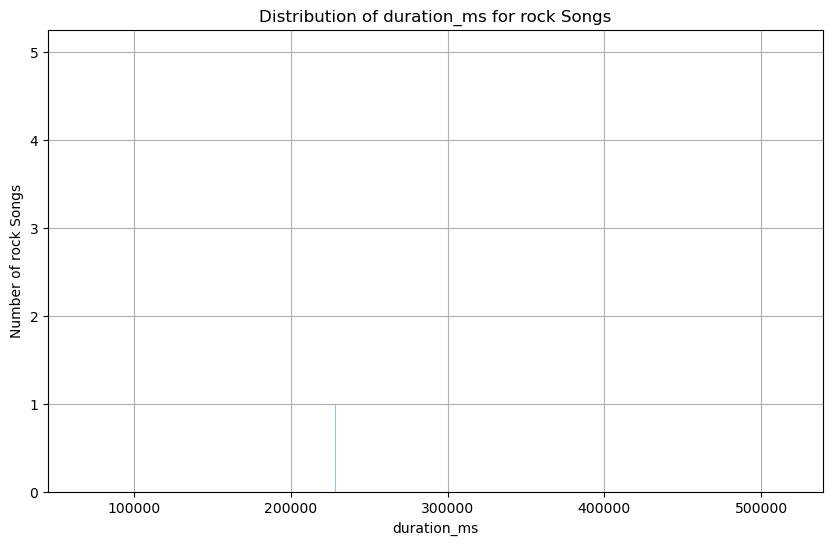

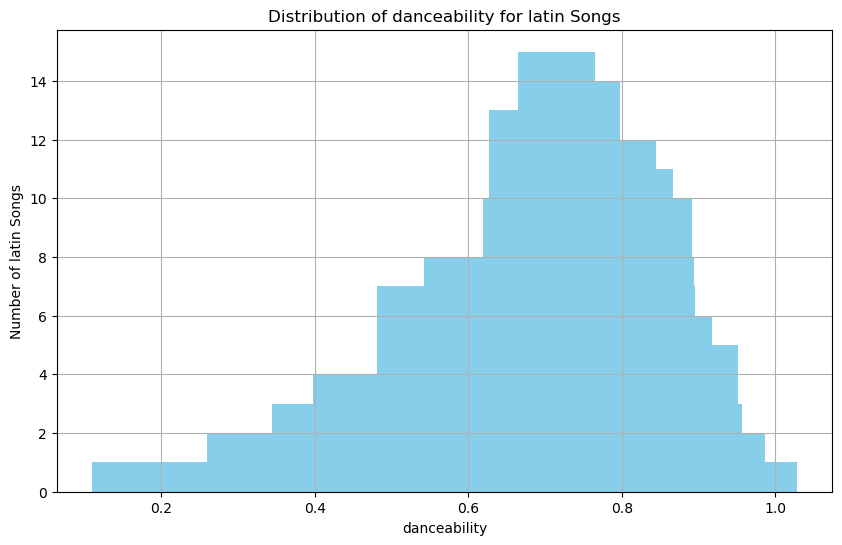

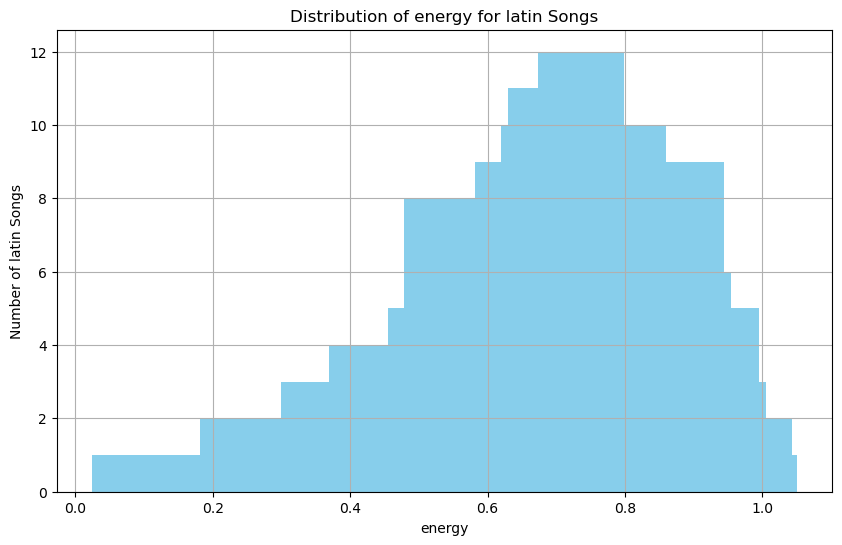

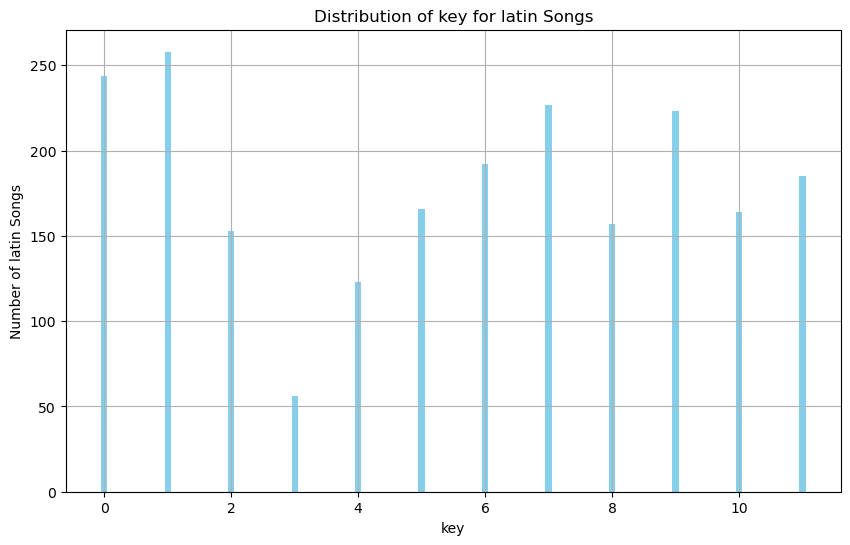

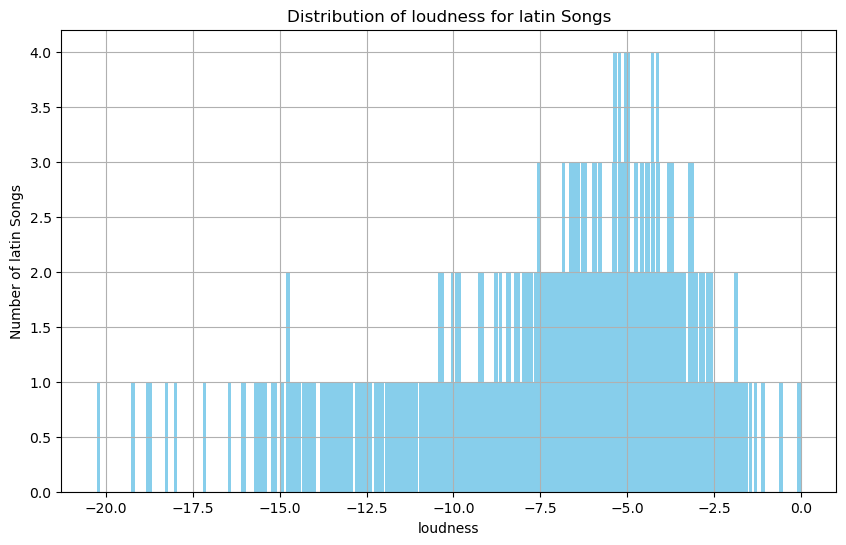

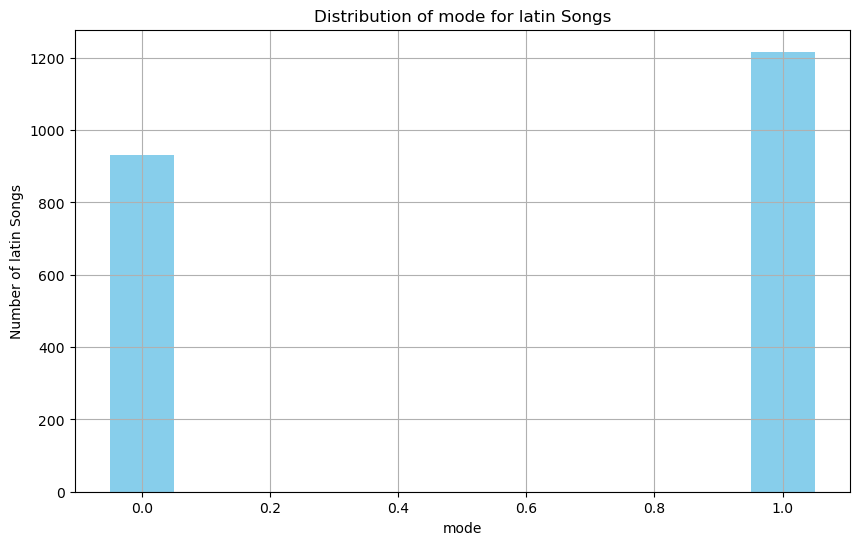

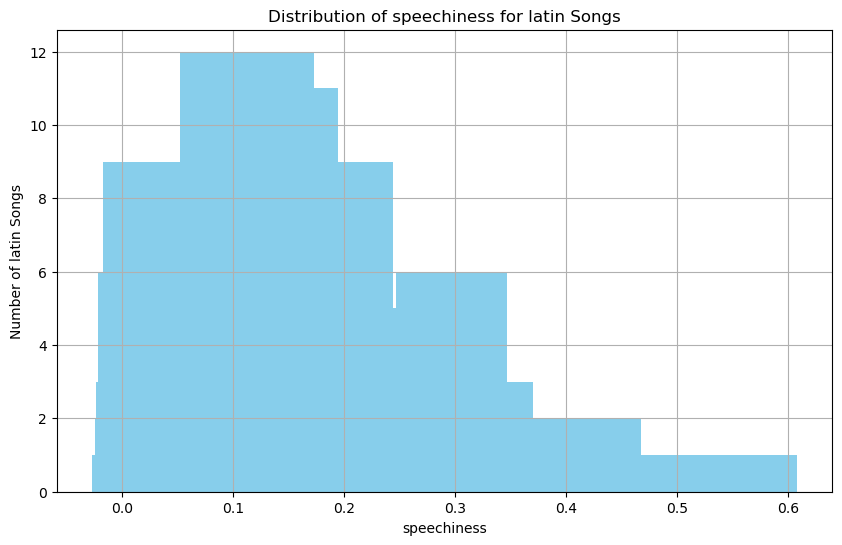

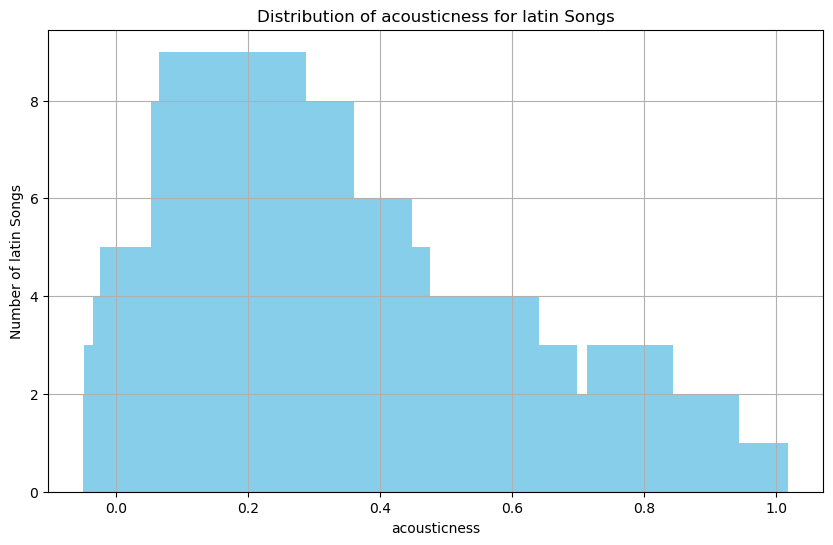

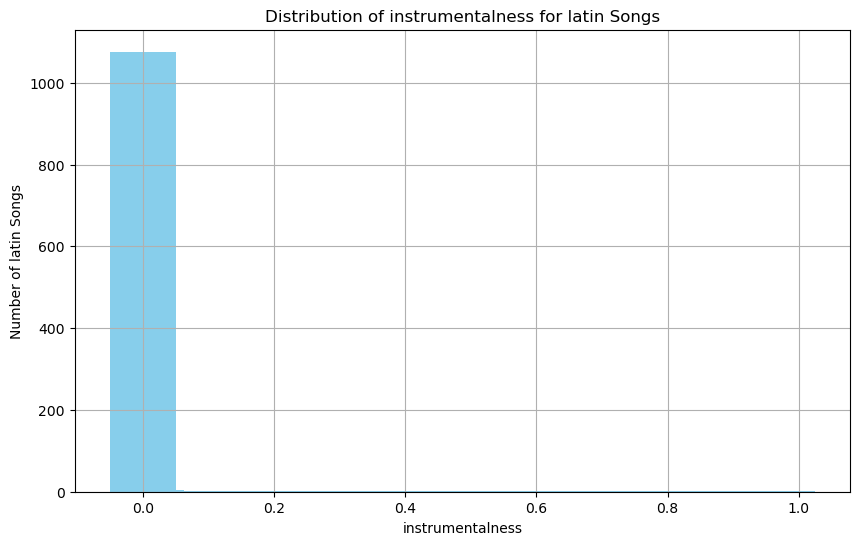

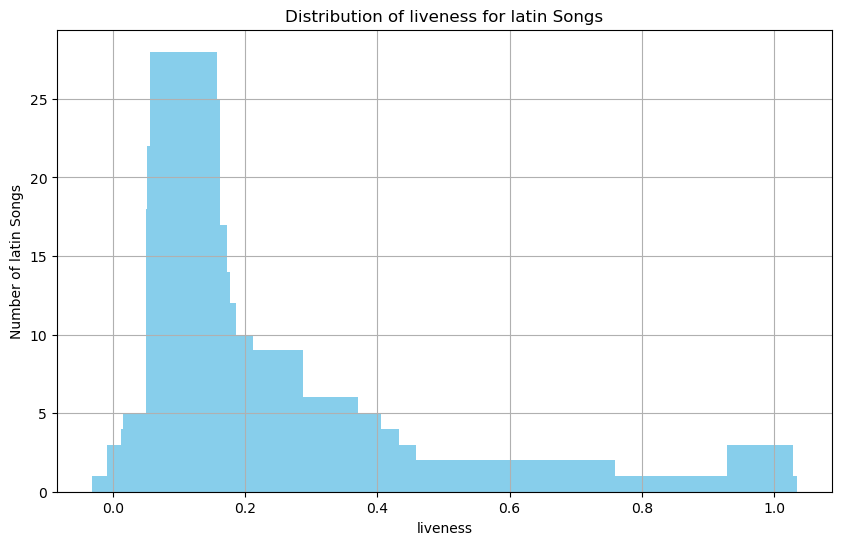

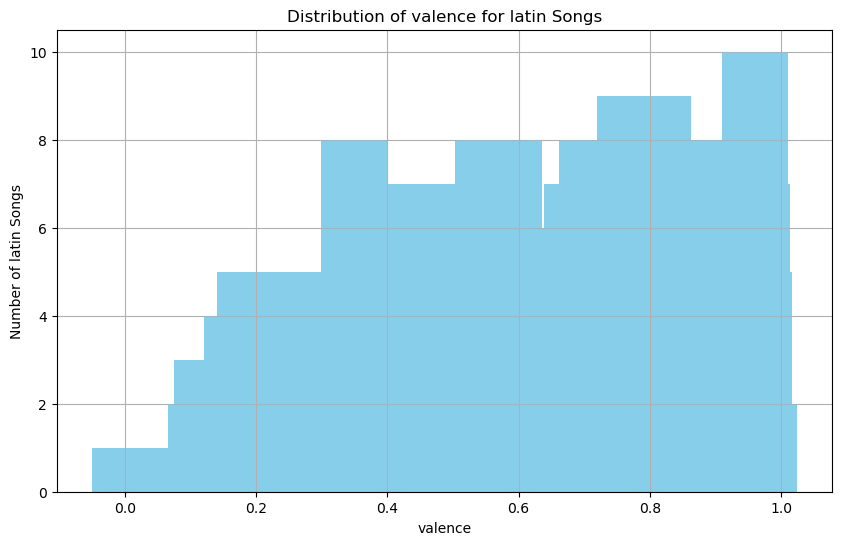

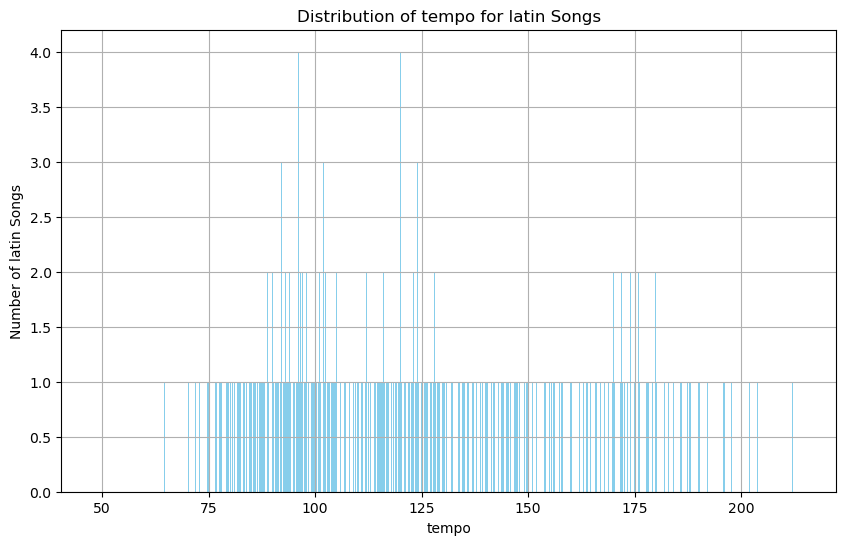

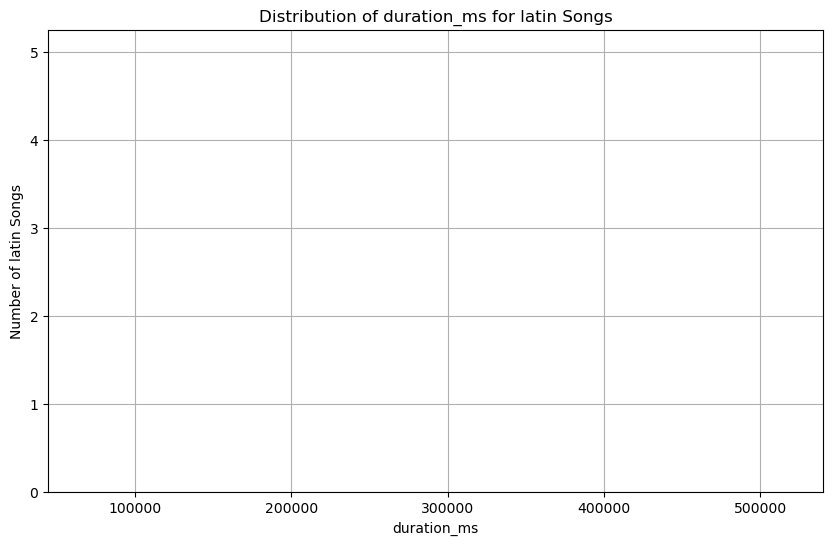

In [20]:
#draw distribution of each audio feature with each genre as a bar chart
import matplotlib.pyplot as plt

# Assuming spark is your SparkSession and df is your DataFrame

for genre in genres:
    for feature in features:
        # Filter the DataFrame to include only rows belonging to the current genre
        genre_songs_df = cleaned_df.filter(cleaned_df.playlist_genre == genre)

        # Group by feature and count the number of songs for each feature
        feature_counts = genre_songs_df.groupBy(feature).count().orderBy(feature)

        # Convert Spark DataFrame to Pandas DataFrame for plotting
        feature_counts_pd = feature_counts.toPandas()

        # Plot the graph
        plt.figure(figsize=(10, 6))
        plt.bar(feature_counts_pd[feature], feature_counts_pd['count'], color='skyblue'  , width=0.1)
        plt.xlabel(feature)
        plt.ylabel('Number of {} Songs'.format(genre))
        plt.title('Distribution of {} for {} Songs'.format(feature, genre))
        plt.grid(True)
        plt.show()
        
        
        